In [1]:
# -*- coding:utf-8 -*-
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
%matplotlib inline

In [2]:
trainpath = os.getcwd().split('code')[0]
user_info = pd.read_table(trainpath+'train/user_info_train.txt',names=['id','sex','job','education','marriage','hukou'],header=None,delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)
overdue = pd.read_table(trainpath+'train/overdue_train.txt',names=['id','overdue'],header=None,delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)

In [3]:
user_info.head()

,id,sex,job,education,marriage,hukou
0,3150,1,2,4,1,4
1,6965,1,2,4,3,2
2,1265,1,3,4,3,1
3,6360,1,2,4,3,2
4,2583,2,2,2,1,1


In [4]:
overdue.head()


,id,overdue
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


In [5]:
train = pd.merge(overdue,user_info)

In [6]:
train.head(10)

,id,overdue,sex,job,education,marriage,hukou
0,1,0,1,2,3,1,3
1,2,0,1,2,3,2,1
2,3,0,1,4,4,1,4
3,4,1,1,4,4,3,2
4,5,0,1,2,2,3,1
5,6,1,1,2,4,1,3
6,7,0,1,2,3,3,1
7,8,0,1,2,4,1,2
8,9,0,2,2,3,1,3
9,10,0,1,3,4,3,2


In [7]:
print train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55596 entries, 0 to 55595
Data columns (total 7 columns):
id           55596 non-null int64
overdue      55596 non-null int64
sex          55596 non-null int64
job          55596 non-null int64
education    55596 non-null int64
marriage     55596 non-null int64
hukou        55596 non-null int64
dtypes: int64(7)
memory usage: 3.4 MB
None


,id,overdue,sex,job,education,marriage,hukou
count,55596.00000,55596.000000,55596.000000,55596.000000,55596.000000,55596.000000,55596.000000
mean,27798.50000,0.129200,1.143967,2.382096,3.232858,1.997356,2.343028
std,16049.32712,0.335424,0.428117,0.755043,0.766713,1.000050,1.181833
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13899.75000,0.000000,1.000000,2.000000,3.000000,1.000000,1.000000
50%,27798.50000,0.000000,1.000000,2.000000,3.000000,2.000000,2.000000
75%,41697.25000,0.000000,1.000000,3.000000,4.000000,3.000000,4.000000
max,55596.00000,1.000000,2.000000,4.000000,4.000000,5.000000,4.000000


id           0.035161
overdue      1.000000
sex         -0.099846
job          0.008267
education    0.038704
marriage     0.003968
hukou        0.010664
Name: overdue, dtype: float64


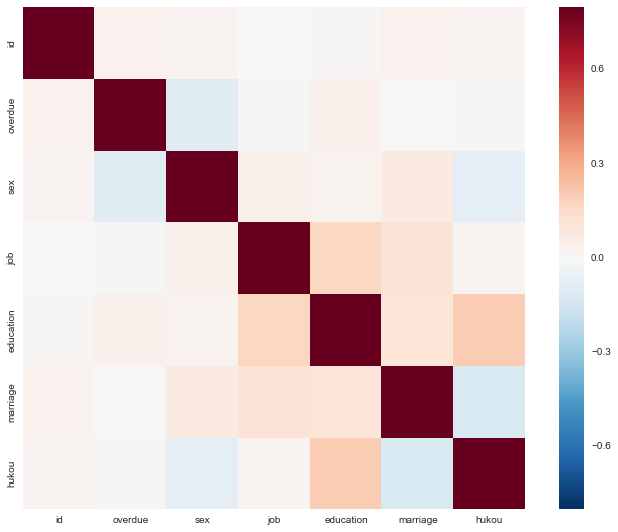

In [8]:
#查看train的特征相关性
# Load the datset of correlations between cortical brain networks
print train.corr()['overdue']
#train.corr()['overdue'].plot
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(train.corr(), vmax=.8, square=True)


## 基本特征可视化分析

### overdue

0    48413
1     7183
Name: overdue, dtype: int64
0    0.8708
1    0.1292
Name: overdue, dtype: float64


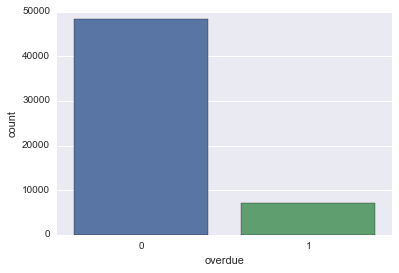

In [9]:
print train['overdue'].value_counts()
sns.countplot(train['overdue'])
print train['overdue'].value_counts(normalize=True)

### sex

1    44254
2     9673
0     1669
Name: sex, dtype: int64
Axes(0.125,0.125;0.775x0.775)
sex
0    0.391851
1    0.127401
2    0.092112
Name: overdue, dtype: float64


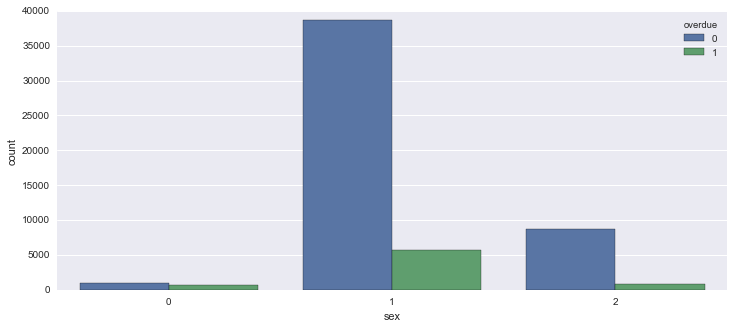

In [10]:
print train['sex'].value_counts()
plt.figure(figsize=(12,5))
print sns.countplot(train['sex'],hue=train['overdue'])
print train['overdue'].groupby(train['sex']).mean()

### job

2    41150
4     8087
3     5898
0      368
1       93
Name: job, dtype: int64
Axes(0.125,0.125;0.775x0.775)
job
0    0.203804
1    0.182796
2    0.126464
3    0.126484
4    0.141091
Name: overdue, dtype: float64


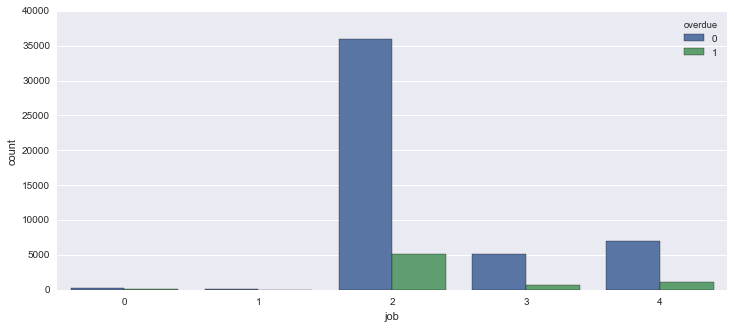

In [11]:
print train['job'].value_counts()
plt.figure(figsize=(12,5))
print sns.countplot(train['job'],hue=train['overdue'])
print train['overdue'].groupby(train['job']).mean()

### education

3    23530
4    22988
2     8483
0      369
1      226
Name: education, dtype: int64
Axes(0.125,0.125;0.775x0.775)
education
0    0.203252
1    0.079646
2    0.095839
3    0.126519
4    0.143553
Name: overdue, dtype: float64


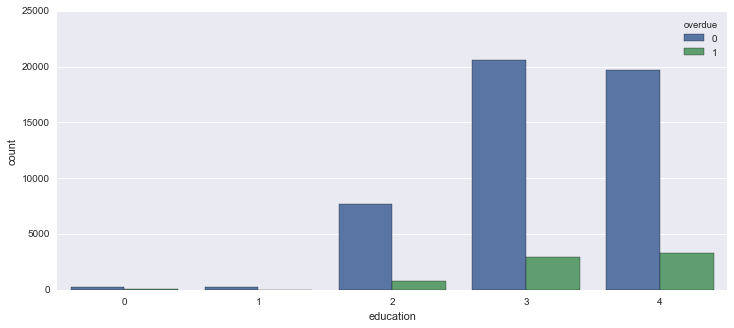

In [12]:
print train['education'].value_counts()
plt.figure(figsize=(12,5))
print sns.countplot(train['education'],hue=train['overdue'])
print train['overdue'].groupby(train['education']).mean()

### marriage

1    25098
3    22554
2     6038
4     1471
0      370
5       65
Name: marriage, dtype: int64
Axes(0.125,0.125;0.775x0.775)
marriage
0    0.202703
1    0.126265
2    0.133322
3    0.128979
4    0.142760
5    0.230769
Name: overdue, dtype: float64


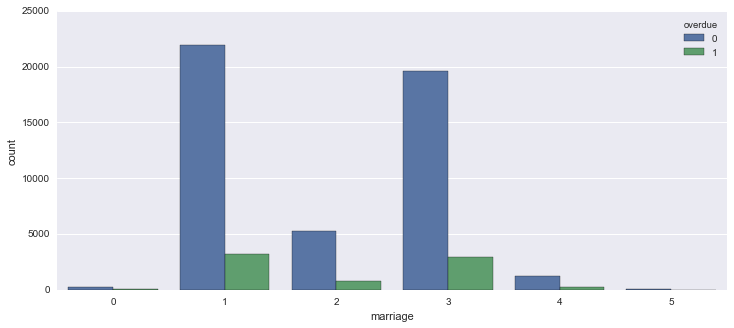

In [13]:
print train['marriage'].value_counts()
plt.figure(figsize=(12,5))
print sns.countplot(train['marriage'],hue=train['overdue'])
print train['overdue'].groupby(train['marriage']).mean()

### hukou

1    25098
3    22554
2     6038
4     1471
0      370
5       65
Name: marriage, dtype: int64
Axes(0.125,0.125;0.775x0.775)
marriage
0    0.202703
1    0.126265
2    0.133322
3    0.128979
4    0.142760
5    0.230769
Name: overdue, dtype: float64


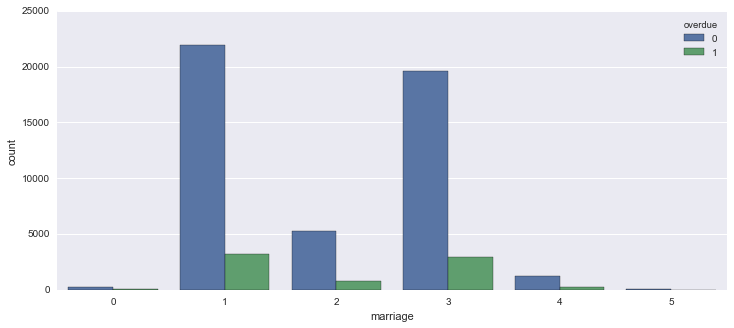

In [14]:
print train['marriage'].value_counts()
plt.figure(figsize=(12,5))
print sns.countplot(train['marriage'],hue=train['overdue'])
print train['overdue'].groupby(train['marriage']).mean()

## 放贷款时间loan_time.txt

In [15]:
loan_time_train = pd.read_table(trainpath+'train/loan_time_train.txt',names=['id','loan_time_stamp'],header=None,delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)
train = pd.merge(train,loan_time_train)

In [16]:
train.head()


,id,overdue,sex,job,education,marriage,hukou,loan_time_stamp
0,1,0,1,2,3,1,3,5914855887
1,2,0,1,2,3,2,1,5914855887
2,3,0,1,4,4,1,4,5914855887
3,4,1,1,4,4,3,2,5914855887
4,5,0,1,2,2,3,1,5914855887


In [17]:
loan_time_train.head()

,id,loan_time_stamp
0,1,5914855887
1,2,5914855887
2,3,5914855887
3,4,5914855887
4,5,5914855887


In [18]:
loan_time_train.describe()

,id,loan_time_stamp
count,55596.00000,5.559600e+04
mean,27798.50000,5.927564e+09
std,16049.32712,3.754645e+06
min,1.00000,5.914856e+09
25%,13899.75000,5.926261e+09
50%,27798.50000,5.928421e+09
75%,41697.25000,5.930321e+09
max,55596.00000,5.932136e+09


In [19]:
loan_time_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55596 entries, 0 to 55595
Data columns (total 2 columns):
id                 55596 non-null int64
loan_time_stamp    55596 non-null int64
dtypes: int64(2)
memory usage: 868.8 KB


In [20]:
train['loan_time_stamp'].value_counts()

5927556687    1256
5926865487     970
5926519887     916
5927815887     882
5930580687     872
5929630287     843
5930494287     840
5927470287     829
5930235087     826
5928075087     808
5929716687     806
5931012687     797
5929803087     782
5930062287     779
5930753487     766
5930148687     762
5930839887     762
5930321487     753
5930667087     753
5929889487     736
5930926287     735
5926951887     733
5926779087     723
5930407887     716
5928420687     701
5931099087     697
5931185487     685
5929975887     682
5929543887     657
5927124687     656
              ... 
5919262287      13
5919175887      13
5919694287      13
5919348687      12
5916065487      10
5923409487       9
5919780687       9
5919953487       8
5920903887       8
5920644687       8
5920731087       8
5919435087       7
5920385487       7
5919607887       7
5919521487       7
5920471887       6
5921163087       6
5920558287       6
5919867087       6
5920212687       4
5920039887       4
5921076687  

### 从time角度看 loantime
变化包括 month day 其他均相同

In [21]:
train['loan_time'] = train['loan_time_stamp'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(float(x))))

In [22]:
train['loan_time'].value_counts()

2157-11-02 07:31:27    1256
2157-10-25 07:31:27     970
2157-10-21 07:31:27     916
2157-11-05 07:31:27     882
2157-12-07 07:31:27     872
2157-11-26 07:31:27     843
2157-12-06 07:31:27     840
2157-11-01 07:31:27     829
2157-12-03 07:31:27     826
2157-11-08 07:31:27     808
2157-11-27 07:31:27     806
2157-12-12 07:31:27     797
2157-11-28 07:31:27     782
2157-12-01 07:31:27     779
2157-12-09 07:31:27     766
2157-12-02 07:31:27     762
2157-12-10 07:31:27     762
2157-12-04 07:31:27     753
2157-12-08 07:31:27     753
2157-11-29 07:31:27     736
2157-12-11 07:31:27     735
2157-10-26 07:31:27     733
2157-10-24 07:31:27     723
2157-12-05 07:31:27     716
2157-11-12 07:31:27     701
2157-12-13 07:31:27     697
2157-12-14 07:31:27     685
2157-11-30 07:31:27     682
2157-11-25 07:31:27     657
2157-10-28 07:31:27     656
                       ... 
2157-08-03 07:31:27      13
2157-07-28 07:31:27      13
2157-07-29 07:31:27      13
2157-07-30 07:31:27      12
2157-06-22 07:31:27 

In [23]:
train['loan_year'] = train['loan_time'].apply(lambda x: str(x).split('-')[0])

In [24]:
train['loan_year'].value_counts()

2157    55596
Name: loan_year, dtype: int64

In [25]:
train['loan_month'] = train['loan_time'].apply(lambda x: str(x).split('-')[1])

11    17543
12    16327
10    12363
09     4822
06     2378
08     1428
07      735
Name: loan_month, dtype: int64
Axes(0.125,0.125;0.775x0.775)
loan_month
06    0.166106
07    0.103401
08    0.067227
09    0.086686
10    0.119388
11    0.139087
12    0.139768
Name: overdue, dtype: float64


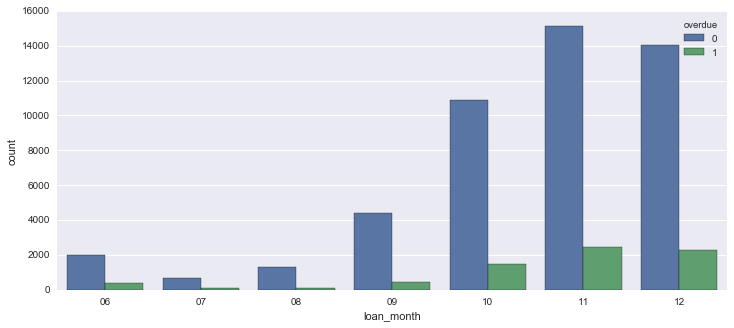

In [26]:
print train['loan_month'].value_counts()
plt.figure(figsize=(12,5))
print sns.countplot(train['loan_month'],hue=train['overdue'])
print train['overdue'].groupby(train['loan_month']).mean()

In [27]:
train['loan_day'] = train['loan_time'].apply(lambda x: str(x).split('-')[2].split(' ')[0])

02    2490
24    2419
21    2375
25    2323
26    2238
23    2163
12    2091
05    2020
01    1982
08    1947
13    1880
10    1859
28    1856
19    1844
27    1843
14    1796
22    1778
29    1774
18    1718
16    1696
09    1683
06    1608
20    1590
15    1560
17    1548
30    1521
11    1483
03    1405
07    1346
04    1213
31     547
Name: loan_day, dtype: int64
Axes(0.125,0.125;0.775x0.775)
loan_day
01    0.125631
02    0.125301
03    0.134520
04    0.133553
05    0.117822
06    0.136194
07    0.127043
08    0.138161
09    0.139632
10    0.132329
11    0.124073
12    0.138211
13    0.125532
14    0.121381
15    0.128205
16    0.121462
17    0.127907
18    0.136787
19    0.130694
20    0.133962
21    0.133895
22    0.118110
23    0.132224
24    0.123605
25    0.121395
26    0.122878
27    0.141074
28    0.139009
29    0.129087
30    0.122945
31    0.126143
Name: overdue, dtype: float64


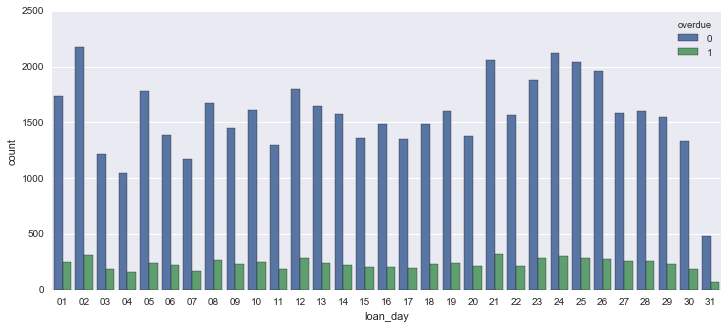

In [28]:
print train['loan_day'].value_counts()
plt.figure(figsize=(12,5))
print sns.countplot(train['loan_day'],hue=train['overdue'])
print train['overdue'].groupby(train['loan_day']).mean()

In [29]:
train['loan_day_1'] = train['loan_day'].apply(lambda x: str(x)[0])

2    20359
1    17475
0    15694
3     2068
Name: loan_day_1, dtype: int64
Axes(0.125,0.125;0.775x0.775)
loan_day_1
0    0.130241
1    0.128927
2    0.129181
3    0.123791
Name: overdue, dtype: float64


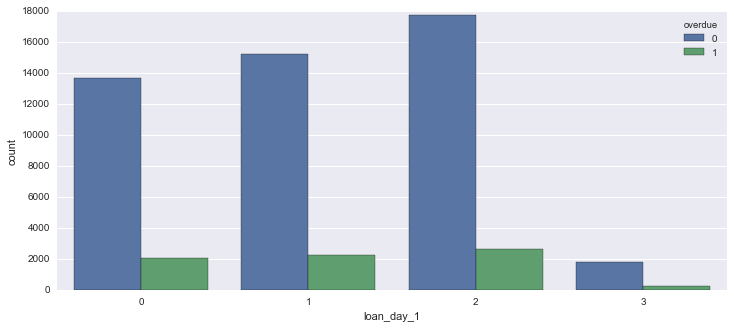

In [30]:
print train['loan_day_1'].value_counts()
plt.figure(figsize=(12,5))
print sns.countplot(train['loan_day_1'],hue=train['overdue'])
print train['overdue'].groupby(train['loan_day_1']).mean()

In [31]:
#train['loan_hour'] = train['loan_time'].apply(lambda x: str(x).split('-')[2].split(' ')[1].split(':')[0])


In [32]:
#print train['loan_hour'].value_counts()
#plt.figure(figsize=(12,5))
#print sns.countplot(train['loan_hour'],hue=train['overdue'])
#print train['overdue'].groupby(train['loan_hour']).mean()

### 从timesstamp角度看 loantime(不可行)
变化包括第3至第8位

## 信用卡账单 bill_detail.txt

In [32]:
bill_detail_train = pd.read_table(trainpath+'train/bill_detail_train.txt',names=['id','bill_time_stamp','bank_id','last_bill_money','last_repay_money','card_limit','current_bill_balance','current_lowest_repay_money','pay_count','current_bill_money','adjust_money','recurrent_interest','available_balance','borrow_cash_limit','repay_condition'],header=None,delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)
#bill_detail_train = bill_detail_train.iloc[:20000,:]

In [34]:
bill_detail_train.head()

,id,bill_time_stamp,bank_id,last_bill_money,last_repay_money,card_limit,current_bill_balance,current_lowest_repay_money,pay_count,current_bill_money,adjust_money,recurrent_interest,available_balance,borrow_cash_limit,repay_condition
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0


In [35]:
bill_detail_train.describe()

,id,bill_time_stamp,bank_id,last_bill_money,last_repay_money,card_limit,current_bill_balance,current_lowest_repay_money,pay_count,current_bill_money,adjust_money,recurrent_interest,available_balance,borrow_cash_limit,repay_condition
count,2.338118e+06,2.338118e+06,2.338118e+06,2.338118e+06,2.338118e+06,2.338118e+06,2.338118e+06,2.338118e+06,2.338118e+06,2.338118e+06,2.338118e+06,2.338118e+06,2.338118e+06,2.338118e+06,2.338118e+06
mean,2.731066e+04,4.829973e+09,1.448161e+02,1.427744e+01,1.377631e+01,1.666117e+01,1.883140e+01,1.702126e+01,9.393315e-01,1.290379e+01,5.697858e-02,2.028316e+00,7.176824e-01,1.020096e+01,1.167606e-04
std,1.590146e+04,2.284576e+09,8.330743e+03,9.835137e+00,8.876699e+00,8.031690e+00,6.021017e+00,5.034382e+00,2.076050e+00,9.125741e+00,2.776627e+00,5.314346e+00,3.656448e+00,9.966707e+00,1.080495e-02
min,2.000000e+00,0.000000e+00,1.000000e+00,-2.406563e+01,-2.488394e+01,-2.243572e+01,-2.361719e+01,-2.292672e+01,0.000000e+00,-2.243188e+01,-2.395331e+01,0.000000e+00,-2.115404e+01,0.000000e+00,0.000000e+00
25%,1.389900e+04,5.878799e+09,6.000000e+00,0.000000e+00,0.000000e+00,1.905498e+01,1.927812e+01,1.713766e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.698000e+04,5.908186e+09,7.000000e+00,1.960654e+01,1.845714e+01,2.015359e+01,2.008135e+01,1.810177e+01,0.000000e+00,1.822041e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.825647e+01,0.000000e+00
75%,4.098800e+04,5.924446e+09,1.300000e+01,2.059639e+01,1.996746e+01,2.106988e+01,2.080107e+01,1.895516e+01,1.000000e+00,1.988685e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.997127e+01,0.000000e+00
max,5.559600e+04,5.952662e+09,5.100570e+05,2.526977e+01,2.833647e+01,2.636820e+01,2.554132e+01,2.472062e+01,1.210000e+02,2.833647e+01,2.351379e+01,2.045085e+01,2.370755e+01,2.833647e+01,1.000000e+00


In [36]:
bill_detail_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338118 entries, 0 to 2338117
Data columns (total 15 columns):
id                            int64
bill_time_stamp               int64
bank_id                       int64
last_bill_money               float64
last_repay_money              float64
card_limit                    float64
current_bill_balance          float64
current_lowest_repay_money    float64
pay_count                     int64
current_bill_money            float64
adjust_money                  float64
recurrent_interest            float64
available_balance             float64
borrow_cash_limit             float64
repay_condition               int64
dtypes: float64(10), int64(5)
memory usage: 267.6 MB


### bill_detail_train : id

In [37]:
bill_detail_train['id'].value_counts().head(10)

29631    7544
44442    5842
14973    4147
22899    3437
31019    3009
48618    2582
45428    2521
32951    2272
22758    2127
24120    1970
Name: id, dtype: int64

In [38]:
train['overdue'].groupby(bill_detail_train['id'].value_counts()).mean()

id
1.0       0.125619
2.0       0.142800
3.0       0.136783
4.0       0.118993
5.0       0.125315
6.0       0.116798
7.0       0.125178
8.0       0.129078
9.0       0.132044
10.0      0.148317
11.0      0.129648
12.0      0.147266
13.0      0.114804
14.0      0.142716
15.0      0.121308
16.0      0.128371
17.0      0.120301
18.0      0.141058
19.0      0.130258
20.0      0.127577
21.0      0.120863
22.0      0.139673
23.0      0.148000
24.0      0.130061
25.0      0.135182
26.0      0.118729
27.0      0.096708
28.0      0.112339
29.0      0.139579
30.0      0.113422
            ...   
1258.0    0.000000
1259.0    1.000000
1270.0    0.000000
1357.0    0.000000
1371.0    0.000000
1429.0    0.000000
1464.0    0.000000
1495.0    0.000000
1499.0    0.000000
1529.0    1.000000
1549.0    1.000000
1557.0    0.000000
1562.0    0.000000
1697.0    1.000000
1715.0    0.000000
1764.0    0.000000
1810.0    0.000000
1822.0    1.000000
1905.0    0.000000
1934.0    0.000000
1970.0    0.000000
2127.0   

In [39]:
bill_detail_train['id'].value_counts().ix[4]

36

In [40]:
bill_detal_id_value_count = bill_detail_train['id'].value_counts()

In [41]:
train['bill_count'] = train['id'].apply(lambda x: bill_detal_id_value_count.ix[x] if x  in bill_detal_id_value_count.index  else 0)

In [42]:

print train['bill_count'].value_counts().head(20)

#print sns.countplot(train['bill_count'],hue=train['overdue'])
print train['overdue'].groupby(pd.qcut(train['bill_count'],10)).mean()
print train['overdue'][train['bill_count']>2000].mean()

1     3232
2     2500
0     2422
3     1952
4     1748
5     1588
6     1524
8     1411
7     1406
9     1189
12    1134
10    1099
14    1009
11     995
13     993
15     948
16     927
24     815
17     798
18     794
Name: bill_count, dtype: int64
bill_count
[0, 1]         0.205341
(1, 4]         0.163226
(4, 8]         0.142857
(8, 13]        0.137153
(13, 19]       0.137733
(19, 27]       0.126257
(27, 39]       0.117806
(39, 59]       0.103124
(59, 101]      0.088020
(101, 7544]    0.063772
Name: overdue, dtype: float64
0.111111111111


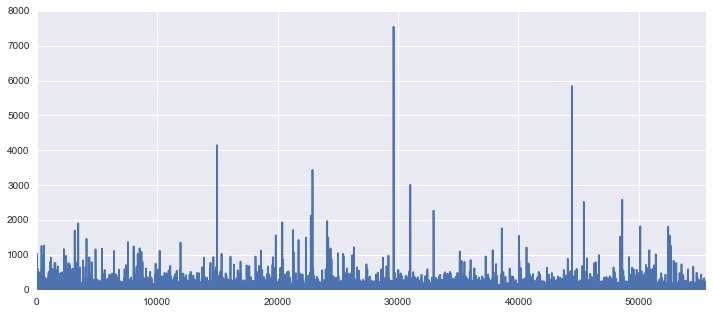

In [43]:
plt.figure(figsize=(12,5))
train['bill_count'].plot()

### 将 bill_detail_train 做根据id分离的操作，切成id不同的小dataframe格式，防治以后根据id切片时产生大量重复操作

In [94]:
def get_bill_detail_train_dic():
    bill_detail_train_dic = {}

    print len(bill_detail_train['id'].unique())
    #count = 0
    for id in bill_detail_train['id'].unique():
        bill_detail_train_dic[id] = bill_detail_train[bill_detail_train['id'] == id]
        #count +=1 
        #if count % 1000 == 0 : print count
    return bill_detail_train_dic

####  train 中有55592个id ，其中53174个在bill_detail 有账单记录 另外2418个没有 可以单独分类

In [64]:
bill_detail_train_id_unique = bill_detail_train['id'].unique()
train['if_have_bill_detail'] = train['id'].apply(lambda x: 1 if x in bill_detail_train_id_unique  else 0 )
no_bill_detail_train_id_unique = train[train['if_have_bill_detail']==0]['id'].unique()

In [66]:
print len(no_bill_detail_train_id_unique)
no_bill_detail_train_id_unique # 存储 bill_detail_train无记录的id

2422


array([    1,    31,    33, ..., 55583, 55586, 55587])

1    53174
0     2422
Name: if_have_bill_detail, dtype: int64
Axes(0.125,0.125;0.775x0.775)
if_have_bill_detail
0    0.238646
1    0.124215
Name: overdue, dtype: float64


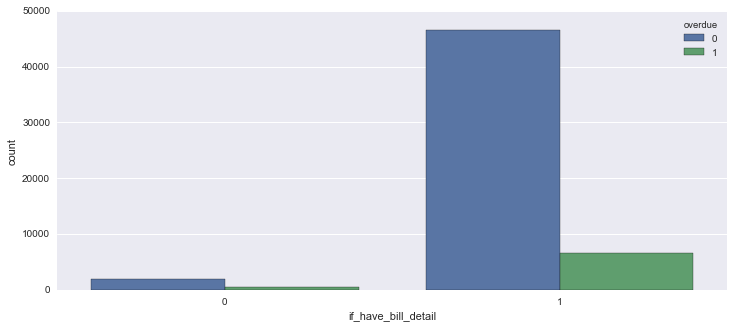

In [67]:
print train['if_have_bill_detail'].value_counts()
plt.figure(figsize=(12,5))
print sns.countplot(train['if_have_bill_detail'],hue=train['overdue'])
print train['overdue'].groupby(train['if_have_bill_detail']).mean()

### bill time

In [68]:
bill_detail_train['bill_time'] = bill_detail_train['bill_time_stamp'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(float(x))))

In [69]:

bill_detail_train['bill_time'].replace('1970-01-01 08:00:00','0000-00-00 00:00:00',inplace = True)
bill_detail_train.head(10)


,id,bill_time_stamp,bank_id,last_bill_money,last_repay_money,card_limit,current_bill_balance,current_lowest_repay_money,pay_count,current_bill_money,adjust_money,recurrent_interest,available_balance,borrow_cash_limit,repay_condition,bill_time
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.000000,0.000000,0.0,0.0,19.971271,0,2157-03-06 10:19:23
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.000000,0.000000,0.0,0.0,19.971271,0,2157-03-06 10:20:01
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.000000,0.000000,0.0,0.0,19.971271,0,2157-03-06 10:20:27
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.000000,0.000000,0.0,0.0,20.307743,0,2157-03-06 10:21:55
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.000000,0.000000,0.0,0.0,20.307743,0,2157-03-06 10:22:42
5,3150,5906744639,6,19.668245,19.722809,20.664418,19.799044,18.194951,1,0.000000,0.000000,0.0,0.0,19.971271,0,2157-03-06 10:23:59
6,3150,5906744682,6,20.106043,20.153592,21.069883,20.242691,18.906474,2,0.000000,0.000000,0.0,0.0,20.376736,0,2157-03-06 10:24:42
7,3150,5926181902,11,0.000000,0.000000,0.000000,16.851878,16.207495,0,0.000000,0.000000,0.0,0.0,0.000000,0,2157-10-17 09:38:22
8,3150,5926181928,16,19.237914,19.420133,19.460445,-16.292183,14.327077,1,17.322724,0.000000,0.0,0.0,19.460445,0,2157-10-17 09:38:48
9,3150,5926182123,14,19.754017,19.355084,21.580708,19.971764,19.420654,0,19.976445,18.659787,0.0,0.0,21.580708,0,2157-10-17 09:42:03


In [70]:
bill_detail_train['bill_year'] = bill_detail_train['bill_time'].apply(lambda x: str(x).split('-')[0])

In [71]:
bill_detail_train['bill_month'] = bill_detail_train['bill_time'].apply(lambda x: str(x).split('-')[1])

In [72]:
bill_detail_train['bill_day'] = bill_detail_train['bill_time'].apply(lambda x: str(x).split('-')[2].split(' ')[0])

In [64]:
bill_detail_train['bill_year'].head()

0    2157
1    2157
2    2157
3    2157
4    2157
Name: bill_year, dtype: object

In [65]:
bill_detail_train['bill_year'].value_counts()

2157    1213607
2156     509376
0000     427447
2158     129938
2155      57359
2154        333
2153         49
2152          9
Name: bill_year, dtype: int64

In [66]:
bill_detail_train['bill_month'].value_counts()

00    427447
10    217147
11    215896
12    213502
09    176540
08    169644
01    161894
07    140965
06    131199
02    129222
05    127318
03    119565
04    107779
Name: bill_month, dtype: int64

In [67]:
bill_detail_train['bill_day'].value_counts().head()

00    427447
15     86618
18     84652
14     83493
17     80202
Name: bill_day, dtype: int64

In [328]:
bill_detail_train = pd.concat((bill_detail_train,pd.get_dummies(bill_detail_train['bill_year'],prefix='bill_year_count')),axis=1)
bill_detail_train = pd.concat((bill_detail_train,pd.get_dummies(bill_detail_train['bill_month'],prefix='bill_month_count')),axis=1)

In [74]:
bill_detail_train.head()

,id,bill_time_stamp,bank_id,last_bill_money,last_repay_money,card_limit,current_bill_balance,current_lowest_repay_money,pay_count,current_bill_money,...,bill_month,bill_day,bill_year_count_0000,bill_year_count_2152,bill_year_count_2153,bill_year_count_2154,bill_year_count_2155,bill_year_count_2156,bill_year_count_2157,bill_year_count_2158
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,...,03,06,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,...,03,06,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,...,03,06,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,...,03,06,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,...,03,06,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
#bill_detail_train_dic = get_bill_detail_train_dic()

53174


In [299]:
"""
pd.get_dummies(bill_detail_train['bill_year'],prefix='bill_year_count').columns.unique()
for x in bill_detail_train_id_unique:
    for a in pd.get_dummies(bill_detail_train['bill_year'],prefix='bill_year_count').columns.unique():
        #print a 
        b =  bill_detail_train[bill_detail_train['id'] == x][a].sum()
    print x,b
"""

"\npd.get_dummies(bill_detail_train['bill_year'],prefix='bill_year_count').columns.unique()\nfor x in bill_detail_train_id_unique:\n    for a in pd.get_dummies(bill_detail_train['bill_year'],prefix='bill_year_count').columns.unique():\n        #print a \n        b =  bill_detail_train[bill_detail_train['id'] == x][a].sum()\n    print x,b\n"

In [323]:
def get_bill_year_number(x):
    if x % 1000 == 0: print x
    #print bill_detail_train[bill_detail_train['id'] == x][bill_year_number].sum()
    return bill_detail_train[bill_detail_train['id'] == x][bill_year_number].sum()


if os.path.exists('bill_year_number_train.csv'):
    print 'bill_year_number_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('bill_year_number_train.csv'))
else:    
    for bill_year_number in pd.get_dummies(bill_detail_train['bill_year'],prefix='bill_year_count').columns.unique():
        print bill_year_number
        #print train['id'].apply(lambda x: bill_detail_train[bill_detail_train['id'] == x][bill_year_number]).sum()
        train[bill_year_number] = train['id'].apply(lambda x: get_bill_year_number(x) )

bill_year_number_train.csv 存在 


In [325]:
#train.head()

In [313]:
print train['overdue'].groupby(train['bill_year_count_0000']).mean()
print train['bill_year_count_0000'].value_counts()

bill_year_count_0000
0.0       0.126939
1.0       0.146838
2.0       0.152529
3.0       0.148599
4.0       0.160935
5.0       0.147110
6.0       0.148352
7.0       0.159420
8.0       0.148649
9.0       0.143921
10.0      0.105114
11.0      0.175497
12.0      0.146269
13.0      0.133562
14.0      0.139860
15.0      0.150579
16.0      0.155963
17.0      0.100877
18.0      0.180412
19.0      0.076923
20.0      0.125000
21.0      0.097297
22.0      0.153465
23.0      0.121359
24.0      0.088372
25.0      0.150327
26.0      0.135714
27.0      0.122302
28.0      0.133858
29.0      0.112903
            ...   
524.0     0.000000
541.0     0.000000
542.0     0.000000
550.0     0.000000
554.0     0.000000
559.0     0.000000
582.0     0.000000
585.0     1.000000
594.0     0.000000
597.0     0.000000
601.0     0.000000
607.0     0.000000
629.0     0.000000
636.0     0.000000
651.0     0.000000
672.0     0.000000
702.0     0.000000
717.0     1.000000
751.0     0.000000
773.0     0.000000
775.0     

In [320]:
def save_bill_year_number():
    csv_save_bill_year_number = pd.concat((train['id'],train.loc[:,pd.get_dummies(bill_detail_train['bill_year'],prefix='bill_year_count').columns.unique()]),axis=1)
    csv_save_bill_year_number.to_csv('bill_year_number_train.csv', sep=",", index = False)
#save_bill_year_number()



In [403]:
def get_bill_month_number(x):
    if x % 1000 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x][bill_month_number].sum()

if os.path.exists('bill_month_number_train.csv'):
    print 'bill_month_number_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('bill_month_number_train.csv'))
else:    
    for bill_month_number in pd.get_dummies(bill_detail_train['bill_month'],prefix='bill_month_count').columns.unique():
        print bill_month_number
        train[bill_month_number] = train['id'].apply(lambda x: get_bill_month_number(x) )


bill_month_number_train.csv 存在 


In [ ]:
def save_bill_month_number():
    csv_save_bill_month_number = pd.concat((train['id'],train.loc[:,pd.get_dummies(bill_detail_train['bill_month'],prefix='bill_month_count').columns.unique()]),axis=1)
    csv_save_bill_month_number.to_csv('bill_month_number_train.csv', sep=",", index = False)
#save_bill_month_number()

In [406]:
print train['overdue'].groupby(train['bill_month_count_02']).mean()
print train['bill_month_count_02'].value_counts()

bill_month_count_02
0.0    0.238646
Name: overdue, dtype: float64
0.0    2422
Name: bill_month_count_02, dtype: int64


#### 最后一月是否有账单

### 银行id

In [120]:
#bill_detail_train['bank_id'].value_counts()
bill_detail_train['bank_id'].ix[~bill_detail_train['bank_id'].isin([7,14,4,16,6,3,10,2,8,11,13,15,9,5,1,12])] = 51
bill_detail_train['bank_id'].value_counts()

/Users/wakemeup/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


7     397436
14    272941
4     223082
16    217685
6     214535
3     189765
10    185577
2     116923
8     116776
11    113553
13     82780
15     81857
9      77616
5      41948
1       3441
12      1579
51       624
Name: bank_id, dtype: int64

In [119]:
#bill_detail_train['bank_id'].ix[~bill_detail_train['bank_id'].isin([7,14,4,16,6,3,10,2,8,11,13,15,9,5,1,12])]

In [121]:

bill_detail_train = pd.concat((bill_detail_train,pd.get_dummies(bill_detail_train['bank_id'],prefix='bank_id_number')),axis=1)


In [ ]:
bill_detail_train.head()

In [372]:
def bank_id_number_train(x):
    if x % 1000 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x][bank_id_number].sum()

if os.path.exists('bank_id_number_train.csv'):
    print 'bank_id_number_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('bank_id_number_train.csv'))
else:
    for bank_id_number in pd.get_dummies(bill_detail_train['bank_id'],prefix='bank_id_number').columns.unique():
        print bank_id_number
        train[bank_id_number] = train['id'].apply(lambda x: bank_id_number_train(x))


bank_id_number_train.csv 存在 


In [375]:
train[pd.get_dummies(bill_detail_train['bank_id'],prefix='bank_id_number').columns.unique()].describe()
    

,bank_id_number_1,bank_id_number_2,bank_id_number_3,bank_id_number_4,bank_id_number_5,bank_id_number_6,bank_id_number_7,bank_id_number_8,bank_id_number_9,bank_id_number_10,bank_id_number_11,bank_id_number_12,bank_id_number_13,bank_id_number_14,bank_id_number_15,bank_id_number_16,bank_id_number_51
count,55596.000000,55596.000000,55596.000000,55596.000000,55596.000000,55596.000000,55596.000000,55596.000000,55596.000000,55596.000000,55596.000000,55596.000000,55596.000000,55596.000000,55596.000000,55596.000000,55596.000000
mean,0.061893,2.103083,3.413285,4.012555,0.754515,3.858821,7.148644,2.100439,1.396072,3.337956,2.042467,0.028401,1.488956,4.909364,1.472354,3.915480,0.011224
std,0.952246,10.762498,14.875062,12.837296,5.375447,14.657761,18.433343,10.561627,8.419882,12.281752,9.416985,0.685362,10.379220,19.083268,12.295714,13.457571,0.534299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.000000,553.000000,2081.000000,1193.000000,343.000000,737.000000,1102.000000,577.000000,491.000000,586.000000,610.000000,48.000000,938.000000,1389.000000,888.000000,653.000000,62.000000


In [381]:
#print train['bank_id_number_51'].value_counts(sort=False)
#print train['overdue'].groupby(train['bank_id_number_51']).mean()

0.0     55544
1.0         6
2.0         7
3.0         2
4.0         5
5.0         3
6.0         4
9.0         1
10.0        3
11.0        1
12.0        2
14.0        2
16.0        3
20.0        2
21.0        1
22.0        2
24.0        2
28.0        2
30.0        1
40.0        1
48.0        1
62.0        1
Name: bank_id_number_51, dtype: int64
bank_id_number_51
0.0     0.129213
1.0     0.166667
2.0     0.285714
3.0     0.000000
4.0     0.200000
5.0     0.000000
6.0     0.000000
9.0     0.000000
10.0    0.000000
11.0    0.000000
12.0    0.000000
14.0    0.000000
16.0    0.333333
20.0    0.000000
21.0    0.000000
22.0    0.000000
24.0    0.000000
28.0    0.000000
30.0    0.000000
40.0    0.000000
48.0    1.000000
62.0    0.000000
Name: overdue, dtype: float64


In [330]:
#train.head()

,id,overdue,sex,job,education,marriage,hukou,loan_time_stamp,loan_time,loan_year,...,bill_year_count_0000,bill_year_count_2152,bill_year_count_2153,bill_year_count_2154,bill_year_count_2155,bill_year_count_2156,bill_year_count_2157,bill_year_count_2158,bill_month_count_00,bill_month_count_01
0,1,0,1,2,3,1,3,5914855887,2157-06-08 07:31:27,2157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,1,2,3,2,1,5914855887,2157-06-08 07:31:27,2157,...,1.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,1.0,0.0
2,3,0,1,4,4,1,4,5914855887,2157-06-08 07:31:27,2157,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,4,1,1,4,4,3,2,5914855887,2157-06-08 07:31:27,2157,...,0.0,0.0,0.0,0.0,0.0,6.0,30.0,0.0,0.0,2.0
4,5,0,1,2,2,3,1,5914855887,2157-06-08 07:31:27,2157,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [331]:
def save_bank_id_number_train():
    csv_save_bank_id_number_train = pd.concat((train['id'],train.loc[:,pd.get_dummies(bill_detail_train['bank_id'],prefix='bank_id_number').columns.unique()]),axis=1)
    csv_save_bank_id_number_train.to_csv('bank_id_number_train.csv', sep=",", index = False)
save_bank_id_number_train()

def save_bank_id_number_train():
    csv_save_bank_id_number_train = pd.concat((train['id'],train.loc[:,pd.get_dummies(bill_detail_train['bank_id'],prefix='bank_id_number').columns.unique()]),axis=1)
    csv_save_bank_id_number_train.to_csv('bank_id_number_train.csv', sep=",", index = False)
save_bank_id_number_train()

KeyError: "None of [['bank_id_number_1' 'bank_id_number_2' 'bank_id_number_3'\n 'bank_id_number_4' 'bank_id_number_5' 'bank_id_number_6'\n 'bank_id_number_7' 'bank_id_number_8' 'bank_id_number_9'\n 'bank_id_number_10' 'bank_id_number_11' 'bank_id_number_12'\n 'bank_id_number_13' 'bank_id_number_14' 'bank_id_number_15'\n 'bank_id_number_16' 'bank_id_number_51']] are in the [columns]"

In [371]:
bank_id_number_column_unique = pd.get_dummies(bill_detail_train['bank_id'],prefix='bank_id_number').columns.unique()
bill_detail_train[bank_id_number_column_unique].head()

,bank_id_number_1,bank_id_number_1,bank_id_number_2,bank_id_number_2,bank_id_number_3,bank_id_number_3,bank_id_number_4,bank_id_number_4,bank_id_number_5,bank_id_number_5,...,bank_id_number_12,bank_id_number_13,bank_id_number_13,bank_id_number_14,bank_id_number_14,bank_id_number_15,bank_id_number_15,bank_id_number_16,bank_id_number_16,bank_id_number_51
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [398]:
bank_id_number_column_unique = pd.get_dummies(bill_detail_train['bank_id'],prefix='bank_id_number').columns.unique()
def get_diff_bank_count_train(x):
    if x % 100 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x][bank_id_number_column_unique].max().sum()

if os.path.exists('diff_bank_count_train.csv'):
    print 'diff_bank_count_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('diff_bank_count_train.csv'))
else:
    train['diff_bank_count'] = train['id'].apply(lambda x: get_diff_bank_count_train(x))



diff_bank_count_train.csv 存在 


In [400]:
train.drop('diff_bank_count',axis=1, inplace=True)

In [401]:
train = pd.merge(train,pd.read_csv('diff_bank_count_train.csv'))

In [402]:
train.head()

,id,overdue,sex,job,education,marriage,hukou,loan_time_stamp,loan_time,loan_year,...,bank_id_number_9,bank_id_number_10,bank_id_number_11,bank_id_number_12,bank_id_number_13,bank_id_number_14,bank_id_number_15,bank_id_number_16,bank_id_number_51,diff_bank_count
0,1,0,1,2,3,1,3,5914855887,2157-06-08 07:31:27,2157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31,0,2,2,4,1,1,5914855887,2157-06-08 07:31:27,2157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33,1,1,2,3,3,1,5914855887,2157-06-08 07:31:27,2157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38,1,1,2,3,1,4,5914855887,2157-06-08 07:31:27,2157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41,0,1,4,4,1,4,5914855887,2157-06-08 07:31:27,2157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [383]:
print train['diff_bank_count'].value_counts()
print train['overdue'].groupby(train['diff_bank_count']).mean()

0.0    2422
Name: diff_bank_count, dtype: int64
diff_bank_count
0.0    0.238646
Name: overdue, dtype: float64


In [339]:
def save_diff_bank_count_train():
    csv_save_diff_bank_count_train = pd.concat((train['id'],train.loc[:,'diff_bank_count']),axis=1)
    csv_save_diff_bank_count_train.to_csv('diff_bank_count_train.csv', sep=",", index = False)
#save_diff_bank_count_train()

def save_diff_bank_count_test():
    csv_save_diff_bank_count_test = pd.concat((test['id'],test.loc[:,'diff_bank_count']),axis=1)
    csv_save_diff_bank_count_test.to_csv('diff_bank_count_test.csv', sep=",", index = False)
#save_bank_id_number_test()

In [131]:
#ban_id_number_column_unique = pd.get_dummies(bill_detail_train['bank_id'],prefix='bank_id_number').columns.unique()
#bill_detail_train[bill_detail_train['id'] == x][ban_id_number_column_unique].max().sum()


14.0

### 上期账单金额 last_bill_money  在－20 到 20变化

In [34]:
def get_last_bill_money_avg_train(x):
    if x % 100 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x]['last_bill_money'].mean()

if os.path.exists('last_bill_money_avg_train.csv'):
    print 'last_bill_money_avg_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('last_bill_money_avg_train.csv'))
else:
    train['last_bill_money_avg'] = train['id'].apply(lambda x: get_last_bill_money_avg_train(x))

last_bill_money_avg_train.csv 存在 


In [341]:
def save_last_bill_money_avg_train():
    csv_save_last_bill_money_avg_train = pd.concat((train['id'],train.loc[:,'last_bill_money_avg']),axis=1)
    csv_save_last_bill_money_avg_train.to_csv('last_bill_money_avg_train.csv', sep=",", index = False)
#save_last_bill_money_avg_train()

(-25, -20]      4823
(-20, -15]     29895
(-15, -10]     19037
(-10, -5]       2188
(-5, 0]       567190
(0, 5]             0
(5, 10]          627
(10, 15]       18384
(15, 20]      784732
(20, 21]      560822
(21, 25]      350403
(25, 30]          17
Name: last_bill_money, dtype: int64


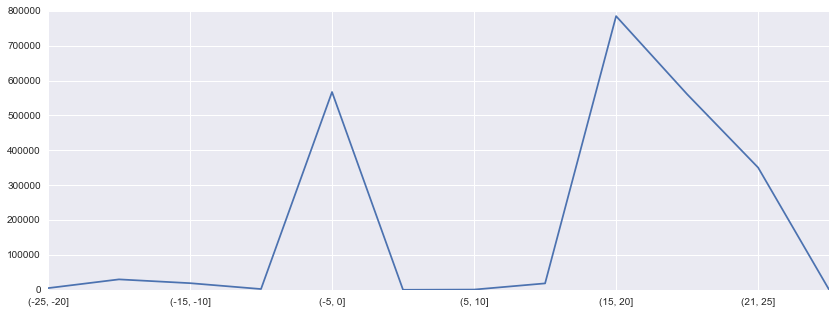

In [250]:
#bill_detail_train 里面 last_bill_money的分布
plt.figure(figsize=(14,5))
print pd.cut(bill_detail_train['last_bill_money'],bins = [-25,-20,-15,-10,-5,0,5,10,15,20,21,25,30]).value_counts(sort=False)
pd.cut(bill_detail_train['last_bill_money'],bins = [-25,-20,-15,-10,-5,0,5,10,15,20,21,25,30]).value_counts(sort=False).plot()

In [35]:
print pd.qcut(train['last_bill_money_avg'],10).value_counts()
print pd.cut(train['last_bill_money_avg'],bins=[-5,0,2,5,10,15,20,25,30]).value_counts(sort=False)

[-21.717, 0]         6910
(20.0142, 25.269]    5318
(16.143, 17.656]     5318
(10.223, 12.671]     5318
(18.987, 20.0142]    5317
(17.656, 18.987]     5317
(14.496, 16.143]     5317
(12.671, 14.496]     5317
(6.768, 10.223]      5317
(0, 6.768]           3725
Name: last_bill_money_avg, dtype: int64
(-5, 0]      6554
(0, 2]        612
(2, 5]       1626
(5, 10]      6250
(10, 15]    12748
(15, 20]    19625
(20, 25]     5402
(25, 30]        1
Name: last_bill_money_avg, dtype: int64


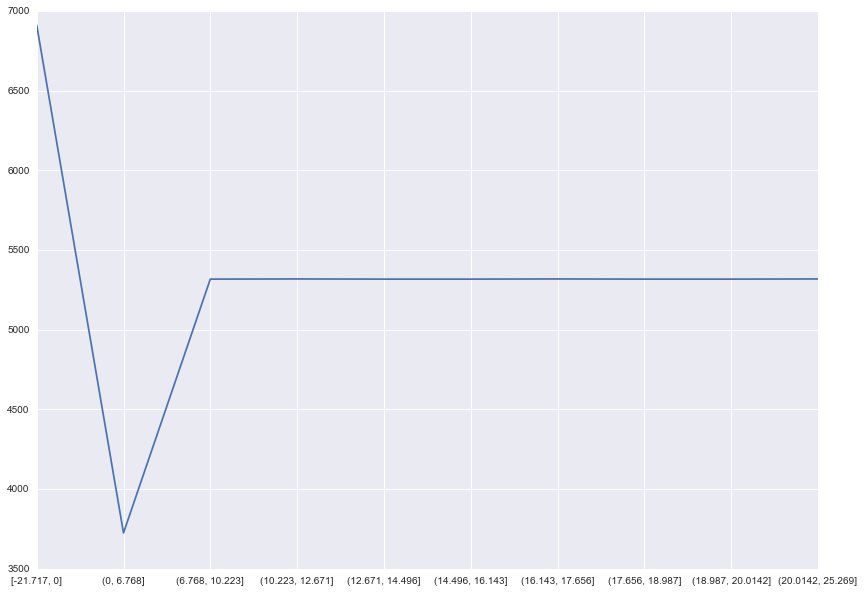

In [280]:
#train['last_bill_money_avg'] (-5,30)
plt.figure(figsize=(14,10))
pd.qcut(train['last_bill_money_avg'],10).value_counts(sort=False).plot()

In [281]:
train['last_bill_money_avg'][train['last_bill_money_avg']==0].count()

6316

In [200]:
#train['last_bill_money_avg'][train['last_bill_money_avg']==0].replace('last_bill_money_avg',np.NaN,inplace = True)

In [36]:
train['overdue'].groupby(pd.qcut(train['last_bill_money_avg'],15)).mean()

last_bill_money_avg
[-21.717, 0]         0.146165
(0, 0.914]           0.083333
(0.914, 6.768]       0.117913
(6.768, 9.493]       0.121580
(9.493, 11.0871]     0.115938
(11.0871, 12.671]    0.117066
(12.671, 13.914]     0.111707
(13.914, 15.0675]    0.110327
(15.0675, 16.143]    0.105219
(16.143, 17.168]     0.107475
(17.168, 18.115]     0.123554
(18.115, 18.987]     0.128350
(18.987, 19.72]      0.146156
(19.72, 20.406]      0.133088
(20.406, 25.269]     0.135684
Name: overdue, dtype: float64

### 上期还款金额 last_repay_money 在－20 到 20变化¶

(-25, -20]       2698
(-20, -15]       5530
(-15, -10]        368
(-10, -5]          52
(-5, 0]        638023
(0, 5]              0
(5, 10]          5822
(10, 15]        29821
(15, 20]      1117428
(20, 21]       345004
(21, 25]       193332
(25, 30]           40
Name: last_repay_money, dtype: int64


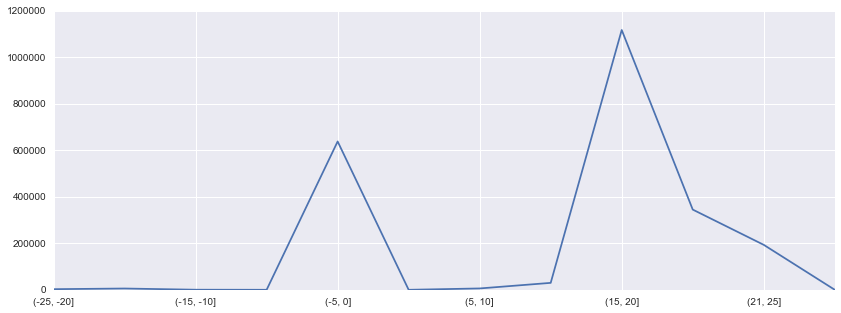

In [246]:
#bill_detail_train 里面 last_bill_money的分布
plt.figure(figsize=(14,5))
print pd.cut(bill_detail_train['last_repay_money'],bins = [-25,-20,-15,-10,-5,0,5,10,15,20,21,25,30]).value_counts(sort=False)
pd.cut(bill_detail_train['last_repay_money'],bins = [-25,-20,-15,-10,-5,0,5,10,15,20,21,25,30]).value_counts(sort=False).plot()

In [37]:
bill_detail_train['last_rest_repay_money'] =bill_detail_train['last_bill_money'] - bill_detail_train['last_repay_money'] 


In [38]:
bill_detail_train['last_rest_repay_money'].describe()
# 值变化范围 －55，50

count    2.338118e+06
mean     5.011306e-01
std      6.549426e+00
min     -5.192576e+01
25%     -4.309000e-03
50%      0.000000e+00
75%      1.659864e+00
max      4.752962e+01
Name: last_rest_repay_money, dtype: float64

(-60, -30]      26769
(-30, -20]      13331
(-20, -5]       49582
(-5, 0]       1321964
(0, 1]         181424
(1, 5]         645654
(5, 10]          4456
(10, 20]        44258
(20, 30]        46913
(30, 40]         1936
(40, 60]         1831
Name: last_rest_repay_money, dtype: int64


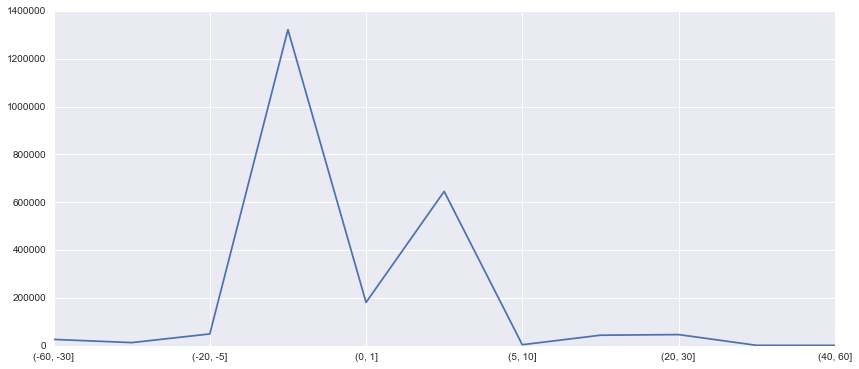

In [285]:
print pd.cut(bill_detail_train['last_rest_repay_money'],[-60,-30,-20,-5,-0,1,5,10,20,30,40,60]).value_counts(sort = False)
plt.figure(figsize=(14,6))
pd.cut(bill_detail_train['last_rest_repay_money'],[-60,-30,-20,-5,-0,1,5,10,20,30,40,60]).value_counts(sort = False).plot()

In [39]:
def get_last_rest_repay_money_avg_train(x):
    if x % 100 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x]['last_rest_repay_money'].mean()
if os.path.exists('last_rest_repay_money_avg_train.csv'):
    print 'last_rest_repay_money_avg_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('last_rest_repay_money_avg_train.csv'))
else:
    train['last_rest_repay_money_avg'] = train['id'].apply(lambda x: get_last_rest_repay_money_avg_train(x))

last_rest_repay_money_avg_train.csv 存在 


In [40]:
train['last_rest_repay_money_avg'].head()

0         NaN
1    0.406401
2   -0.213403
3    2.319367
4    2.139467
Name: last_rest_repay_money_avg, dtype: float64

In [359]:
def save_last_rest_repay_money_avg_train():
    csv_save_last_bill_money_avg_train = pd.concat((train['id'],train.loc[:,'last_rest_repay_money_avg']),axis=1)
    csv_save_last_bill_money_avg_train.to_csv('last_rest_repay_money_avg_train.csv', sep=",", index = False)
save_last_rest_repay_money_avg_train()

In [365]:
train['overdue'].groupby(pd.qcut(train['last_rest_repay_money_avg'],14)).mean()

last_rest_repay_money_avg
[-43.167, -4.585]     0.139510
(-4.585, -1.818]      0.119010
(-1.818, -0.713]      0.091890
(-0.713, -0.173]      0.105845
(-0.173, -0.00316]    0.117694
(-0.00316, 0]         0.134037
(0, 0.052]            0.106407
(0.052, 0.326]        0.107688
(0.326, 0.663]        0.106372
(0.663, 1.0567]       0.113744
(1.0567, 1.52]        0.105582
(1.52, 2.135]         0.102686
(2.135, 3.817]        0.141390
(3.817, 26.505]       0.225849
Name: overdue, dtype: float64

In [41]:

def get_last_rest_repay_money_morethan0_count_train(x):
    if x % 100 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x][bill_detail_train['last_rest_repay_money']>0].shape[0]
if os.path.exists('last_rest_repay_money_morethan0_count_train.csv'):
    print 'last_rest_repay_money_morethan0_count_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('last_rest_repay_money_morethan0_count_train.csv'))
else:
    bill_detail_train['last_rest_repay_money'] =bill_detail_train['last_bill_money'] - bill_detail_train['last_repay_money'] 
    train['last_rest_repay_money_morethan0_count'] = train['id'].apply(lambda x: get_last_rest_repay_money_morethan0_count_train(x))
    
def get_last_rest_repay_money_morethan0_count_test(x):
    if x % 100 == 0: print x
    return bill_detail_test[bill_detail_test['id'] == x][bill_detail_test['last_rest_repay_money']>0].shape[0]
if os.path.exists('last_rest_repay_money_morethan0_count_test.csv'):
    print 'last_rest_repay_money_morethan0_count_test.csv 存在 '
    test = pd.merge(test,pd.read_csv('last_rest_repay_money_morethan0_count_test.csv'))
else:
    bill_detail_test['last_rest_repay_money'] =bill_detail_test['last_bill_money'] - bill_detail_test['last_repay_money'] 
    test['last_rest_repay_money_morethan0_count'] = test['id'].apply(lambda x: get_last_rest_repay_money_morethan0_count_test(x))
 

/Users/wakemeup/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

NameError: name 'bill_detail_test' is not defined

In [51]:
def save_last_rest_repay_money_morethan0_count_train():
    csv_save_last_rest_repay_money_morethan0_count_train = pd.concat((train['id'],train.loc[:,'last_rest_repay_money_morethan0_count']),axis=1)
    csv_save_last_rest_repay_money_morethan0_count_train.to_csv('last_rest_repay_money_morethan0_count_train.csv', sep=",", index = False)
save_last_rest_repay_money_morethan0_count_train()

def save_last_rest_repay_money_morethan0_count_test():
    csv_save_last_rest_repay_money_morethan0_count_test = pd.concat((test['id'],test.loc[:,'last_rest_repay_money_morethan0_count']),axis=1)
    csv_save_last_rest_repay_money_morethan0_count_test.to_csv('last_rest_repay_money_morethan0_count_test.csv', sep=",", index = False)
#save_last_rest_repay_money_morethan0_count_test()

In [44]:
print train['last_rest_repay_money_morethan0_count'].value_counts().head(10)
print train['overdue'].groupby(train['last_rest_repay_money_morethan0_count']).mean()

0    16690
1     4322
2     3287
3     2238
4     2009
5     1649
6     1576
7     1242
8     1237
9     1114
Name: last_rest_repay_money_morethan0_count, dtype: int64
last_rest_repay_money_morethan0_count
0       0.145596
1       0.166590
2       0.134773
3       0.147006
4       0.147835
5       0.132201
6       0.147843
7       0.132045
8       0.145513
9       0.119390
10      0.121355
11      0.127090
12      0.108527
13      0.135318
14      0.139410
15      0.110000
16      0.098437
17      0.115059
18      0.143363
19      0.101476
20      0.121269
21      0.121901
22      0.111789
23      0.119159
24      0.099078
25      0.119048
26      0.135734
27      0.089286
28      0.106322
29      0.117845
          ...   
591     0.000000
598     0.000000
607     0.000000
610     1.000000
629     0.000000
670     0.000000
677     0.000000
689     0.000000
700     0.000000
717     0.000000
750     1.000000
820     0.000000
825     0.000000
827     0.000000
830     0.000000
831     0.00

In [49]:

def get_last_rest_repay_money_morethan10_count_train(x):
    if x % 100 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x][bill_detail_train['last_rest_repay_money']>0].shape[0]
if os.path.exists('last_rest_repay_money_morethan10_count_train.csv'):
    print 'last_rest_repay_money_morethan10_count_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('last_rest_repay_money_morethan10_count_train.csv'))
else:
    bill_detail_train['last_rest_repay_money'] =bill_detail_train['last_bill_money'] - bill_detail_train['last_repay_money'] 
    train['last_rest_repay_money_morethan10_count'] = train['id'].apply(lambda x: get_last_rest_repay_money_morethan10_count_train(x))
    


/Users/wakemeup/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

NameError: name 'bill_detail_test' is not defined

In [52]:
def save_last_rest_repay_money_morethan10_count_train():
    csv_save_last_rest_repay_money_morethan10_count_train = pd.concat((train['id'],train.loc[:,'last_rest_repay_money_morethan10_count']),axis=1)
    csv_save_last_rest_repay_money_morethan10_count_train.to_csv('last_rest_repay_money_morethan10_count_train.csv', sep=",", index = False)
save_last_rest_repay_money_morethan10_count_train()

def save_last_rest_repay_money_morethan10_count_test():
    csv_save_last_rest_repay_money_morethan10_count_test = pd.concat((test['id'],test.loc[:,'last_rest_repay_money_morethan10_count']),axis=1)
    csv_save_last_rest_repay_money_morethan10_count_test.to_csv('last_rest_repay_money_morethan10_count_test.csv', sep=",", index = False)
#save_last_rest_repay_money_morethan10_count_test()

In [50]:
print train['last_rest_repay_money_morethan10_count'].value_counts().head(10)
print train['overdue'].groupby(train['last_rest_repay_money_morethan10_count']).mean()

0    16690
1     4322
2     3287
3     2238
4     2009
5     1649
6     1576
7     1242
8     1237
9     1114
Name: last_rest_repay_money_morethan10_count, dtype: int64
last_rest_repay_money_morethan10_count
0       0.145596
1       0.166590
2       0.134773
3       0.147006
4       0.147835
5       0.132201
6       0.147843
7       0.132045
8       0.145513
9       0.119390
10      0.121355
11      0.127090
12      0.108527
13      0.135318
14      0.139410
15      0.110000
16      0.098437
17      0.115059
18      0.143363
19      0.101476
20      0.121269
21      0.121901
22      0.111789
23      0.119159
24      0.099078
25      0.119048
26      0.135734
27      0.089286
28      0.106322
29      0.117845
          ...   
591     0.000000
598     0.000000
607     0.000000
610     1.000000
629     0.000000
670     0.000000
677     0.000000
689     0.000000
700     0.000000
717     0.000000
750     1.000000
820     0.000000
825     0.000000
827     0.000000
830     0.000000
831     0.

### card limit avg

In [46]:
def get_card_limit_avg_train(x):
    if x % 100 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x]['card_limit'].mean()
if os.path.exists('card_limit_avg_train.csv'):
    print 'card_limit_avg_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('card_limit_avg_train.csv'))
else:
    train['card_limit_avg'] = train['id'].apply(lambda x: get_card_limit_avg_train(x))
 





card_limit_avg_train.csv 存在 


In [47]:
def save_card_limit_avg_train():
    csv_save_last_bill_money_avg_train = pd.concat((train['id'],train.loc[:,'card_limit_avg']),axis=1)
    csv_save_last_bill_money_avg_train.to_csv('card_limit_avg_train.csv', sep=",", index = False)
#save_card_limit_avg_train()


In [48]:
print train['overdue'].groupby(pd.qcut(train['card_limit_avg'],12)).mean()

card_limit_avg
[-18.99, 4.932]       0.138764
(4.932, 11.213]       0.118032
(11.213, 14.244]      0.113970
(14.244, 16.46]       0.097044
(16.46, 18.362]       0.107835
(18.362, 19.287]      0.145937
(19.287, 19.748]      0.134852
(19.748, 20.00774]    0.129621
(20.00774, 20.334]    0.125141
(20.334, 20.664]      0.137378
(20.664, 21.0699]     0.123828
(21.0699, 25.27]      0.117461
Name: overdue, dtype: float64


### current_bill_balance

In [58]:
def get_current_bill_balance_avg_train(x):
    if x % 100 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x]['card_limit'].mean()
if os.path.exists('current_bill_balance_avg_train.csv'):
    print 'current_bill_balance_avg_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('current_bill_balance_avg_train.csv'))
else:
    train['current_bill_balance_avg'] = train['id'].apply(lambda x: get_current_bill_balance_avg_train(x))

current_bill_balance_avg_train.csv 存在 


In [69]:
train['overdue'].groupby(pd.qcut(train['current_bill_balance_avg'],12)).mean()

current_bill_balance_avg
[-18.99, 4.932]       0.138764
(4.932, 11.213]       0.118032
(11.213, 14.244]      0.113970
(14.244, 16.46]       0.097044
(16.46, 18.362]       0.107835
(18.362, 19.287]      0.145937
(19.287, 19.748]      0.134852
(19.748, 20.00774]    0.129621
(20.00774, 20.334]    0.125141
(20.334, 20.664]      0.137378
(20.664, 21.0699]     0.123828
(21.0699, 25.27]      0.117461
Name: overdue, dtype: float64

In [55]:
pd.qcut(bill_detail_train['current_bill_balance'],10).value_counts(sort=False)

[-23.617, 17.945]     233812
(17.945, 19.0416]     233816
(19.0416, 19.461]     233808
(19.461, 19.843]      233811
(19.843, 20.0814]     233814
(20.0814, 20.406]     233814
(20.406, 20.666]      233809
(20.666, 21.00725]    233810
(21.00725, 21.423]    233813
(21.423, 25.541]      233811
Name: current_bill_balance, dtype: int64

### current_bill_balance<0

In [57]:
bill_detail_train['current_bill_balance'][bill_detail_train['current_bill_balance']<0].describe()

count    49564.000000
mean       -15.871089
std          3.364300
min        -23.617187
25%        -18.655502
50%        -16.057095
75%        -13.531017
max         -6.849967
Name: current_bill_balance, dtype: float64

In [70]:
def get_current_bill_balance_lessthan0_count_train(x):
    if x % 100 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x][bill_detail_train['current_bill_balance']<0].shape[0]
if os.path.exists('current_bill_balance_lessthan0_count_train.csv'):
    print 'current_bill_balance_lessthan0_count_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('current_bill_balance_lessthan0_count_train.csv'))
else:
    train['current_bill_balance_lessthan0_count'] = train['id'].apply(lambda x: get_current_bill_balance_lessthan0_count_train(x))
    

/Users/wakemeup/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [80]:
def save_current_bill_balance_lessthan0_count_train():
    csv_save_current_bill_balance_lessthan0_count_train = pd.concat((train['id'],train.loc[:,'current_bill_balance_lessthan0_count']),axis=1)
    csv_save_current_bill_balance_lessthan0_count_train.to_csv('current_bill_balance_lessthan0_count_train.csv', sep=",", index = False)
save_current_bill_balance_lessthan0_count_train()

In [79]:
print train['current_bill_balance_lessthan0_count'].value_counts()
train['overdue'].groupby(train['current_bill_balance_lessthan0_count']).mean()

0      43993
1       4141
2       2845
3       1078
4        972
6        490
5        425
7        249
8        244
10       161
9        152
12       123
11        81
14        76
13        76
15        59
17        46
16        38
19        31
18        27
20        27
22        24
21        16
25        13
26        13
23        12
24        12
32        11
28        10
31         9
       ...  
96         1
69         1
95         1
71         1
82         1
93         1
61         1
91         1
89         1
56         1
55         1
148        1
116        1
83         1
51         1
178        1
50         1
106        1
113        1
81         1
110        1
173        1
109        1
63         1
652        1
108        1
395        1
75         1
234        1
77         1
Name: current_bill_balance_lessthan0_count, dtype: int64


current_bill_balance_lessthan0_count
0      0.133135
1      0.141270
2      0.105097
3      0.115955
4      0.085391
5      0.110588
6      0.104082
7      0.096386
8      0.077869
9      0.125000
10     0.024845
11     0.074074
12     0.097561
13     0.092105
14     0.078947
15     0.050847
16     0.105263
17     0.065217
18     0.000000
19     0.096774
20     0.000000
21     0.250000
22     0.125000
23     0.000000
24     0.083333
25     0.230769
26     0.000000
27     0.000000
28     0.100000
29     0.111111
         ...   
71     0.000000
75     0.000000
77     1.000000
81     0.000000
82     0.000000
83     0.000000
89     0.000000
91     0.000000
93     0.000000
94     0.000000
95     0.000000
96     0.000000
97     0.000000
98     0.000000
106    0.000000
108    0.000000
109    0.000000
110    0.000000
113    0.000000
116    0.000000
134    0.000000
142    0.000000
148    0.000000
161    0.000000
173    0.000000
178    0.000000
234    1.000000
320    0.000000
395    0.000000
652

### current_lowest_repay_money

In [95]:
pd.qcut(bill_detail_train['current_lowest_repay_money'],10).value_counts()

(17.732, 18.102]     233835
[-22.927, 15.776]    233820
(19.172, 19.752]     233817
(17.358, 17.732]     233815
(18.398, 18.765]     233814
(16.859, 17.358]     233812
(18.765, 19.172]     233808
(19.752, 24.721]     233807
(15.776, 16.859]     233804
(18.102, 18.398]     233786
Name: current_lowest_repay_money, dtype: int64

### current_card_limit

(17.732, 18.102]     233835
[-22.927, 15.776]    233820
(19.172, 19.752]     233817
(17.358, 17.732]     233815
(18.398, 18.765]     233814
(16.859, 17.358]     233812
(18.765, 19.172]     233808
(19.752, 24.721]     233807
(15.776, 16.859]     233804
(18.102, 18.398]     233786
Name: current_lowest_repay_money, dtype: int64

In [83]:
bill_detail_train['current_card_limit'] = bill_detail_train['current_lowest_repay_money']-bill_detail_train['current_bill_money']

In [84]:
pd.qcut(bill_detail_train['current_card_limit'],10).value_counts(sort=False)

[-45.998, -2.996]    233999
(-2.996, -2.303]     233625
(-2.303, -1.636]     233812
(-1.636, -0.801]     233831
(-0.801, -0.191]     233792
(-0.191, 0.133]      233812
(0.133, 11.611]      233820
(11.611, 17.934]     233803
(17.934, 18.915]     233841
(18.915, 40.663]     233783
Name: current_card_limit, dtype: int64

In [85]:
def get_current_card_limit_avg_train(x):
    if x % 100 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x]['current_card_limit'].mean()
if os.path.exists('current_card_limit_avg_train.csv'):
    print 'current_card_limit_avg_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('current_card_limit_avg_train.csv'))
else:
    train['current_card_limit_avg'] = train['id'].apply(lambda x: get_current_card_limit_avg_train(x))
 


current_card_limit_avg_train.csv 存在 


In [92]:
train['overdue'].groupby(pd.qcut(train['current_card_limit_avg'],9)).mean()

current_card_limit_avg
[-43.198, -2.346]    0.132848
(-2.346, -1.246]     0.138964
(-1.246, -0.172]     0.124915
(-0.172, 1.747]      0.129147
(1.747, 4.326]       0.107651
(4.326, 6.996]       0.112390
(6.996, 10.241]      0.119160
(10.241, 16.906]     0.121361
(16.906, 36.995]     0.131494
Name: overdue, dtype: float64

###  pay_count

In [99]:
def get_pay_count_avg_train(x):
    if x % 100 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x]['pay_count'].mean()
if os.path.exists('pay_count_avg_train.csv'):
    print 'pay_count_avg_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('pay_count_avg_train.csv'))
else:
    train['pay_count_avg'] = train['id'].apply(lambda x: get_pay_count_avg_train(x))
    
def save_pay_count_avg_train():
    csv_save_last_bill_money_avg_train = pd.concat((train['id'],train.loc[:,'pay_count_avg']),axis=1)
    csv_save_last_bill_money_avg_train.to_csv('pay_count_avg_train.csv', sep=",", index = False)
#save_pay_count_avg_train()


pay_count_avg_train.csv 存在 


In [125]:
print train[~train['pay_count_avg'].isnull()].shape[0]

53174


In [154]:
pd.cut(train['pay_count_avg'],bins=[-1,0,0.2,1,1.2,1.5,1000]).value_counts()

(-1, 0]        18337
(0.2, 1]       16612
(1.5, 1000]     8661
(0, 0.2]        4220
(1.2, 1.5]      3139
(1, 1.2]        2205
Name: pay_count_avg, dtype: int64

In [155]:
train['overdue'].groupby(pd.cut(train['pay_count_avg'],bins=[-1,0,0.2,1,1.2,1.5,1000])).mean()

pay_count_avg
(-1, 0]        0.127938
(0, 0.2]       0.096445
(0.2, 1]       0.118288
(1, 1.2]       0.100227
(1.2, 1.5]     0.130296
(1.5, 1000]    0.145133
Name: overdue, dtype: float64

### adjust_money

In [157]:
bill_detail_train['adjust_money'].value_counts()

 0.000000     2289959
-13.756664        361
 18.256472        290
 16.059248        232
 13.756664        227
 14.449810        225
 9.151598         196
 19.971271        195
-20.664418        159
-19.971271        153
-18.938328        143
 18.447175        136
-17.157860        120
-19.460445        119
-20.191370        117
-20.153592        110
 18.778356        108
 17.668686        102
 17.673773        100
 20.391920        100
 21.618728        100
 19.765471        100
 20.582305        100
 20.664418         97
 15.366101         91
-19.054980         90
 19.931802         88
 19.573717         86
 18.361833         85
 19.054980         83
               ...   
-20.534606          1
-20.909434          1
 14.869835          1
-19.371869          1
 21.416345          1
-20.780432          1
-19.485450          1
-15.037319          1
 18.776258          1
-20.949336          1
 11.255639          1
 19.806023          1
 20.961778          1
-19.252108          1
-20.633457

In [161]:
def get_adjust_money_morethan0_count_train(x):
    if x % 100 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x][bill_detail_train['adjust_money']>0].shape[0]
if os.path.exists('adjust_money_morethan0_count_train.csv'):
    print 'adjust_money_morethan0_count_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('adjust_money_morethan0_count_train.csv'))
else:
    train['adjust_money_morethan0_count'] = train['id'].apply(lambda x: get_adjust_money_morethan0_count_train(x))


/Users/wakemeup/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [174]:
def save_adjust_money_morethan0_count_train():
    csv_save_adjust_money_morethan0_count_train = pd.concat((train['id'],train.loc[:,'adjust_money_morethan0_count']),axis=1)
    csv_save_adjust_money_morethan0_count_train.to_csv('adjust_money_morethan0_count_train.csv', sep=",", index = False)
save_adjust_money_morethan0_count_train()

In [166]:
def get_adjust_money_lessthan0_count_train(x):
    if x % 100 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x][bill_detail_train['adjust_money']<0].shape[0]
if os.path.exists('adjust_money_lessthan0_count_train.csv'):
    print 'adjust_money_lessthan0_count_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('adjust_money_lessthan0_count_train.csv'))
else:
    train['adjust_money_lessthan0_count'] = train['id'].apply(lambda x: get_adjust_money_lessthan0_count_train(x))


/Users/wakemeup/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [173]:
def save_adjust_money_lessthan0_count_train():
    csv_save_adjust_money_lessthan0_count_train = pd.concat((train['id'],train.loc[:,'adjust_money_lessthan0_count']),axis=1)
    csv_save_adjust_money_lessthan0_count_train.to_csv('adjust_money_lessthan0_count_train.csv', sep=",", index = False)
save_adjust_money_lessthan0_count_train()

In [171]:
print train['adjust_money_morethan0_count'].value_counts()
train['overdue'].groupby(train['adjust_money_morethan0_count']).mean()

0      51559
1       1204
2        759
3        381
4        348
6        186
5        179
7        143
8        114
9         81
10        78
12        67
11        51
13        43
14        34
15        29
20        27
18        27
19        21
16        20
17        19
25        16
26        15
24        14
23        14
21        13
22        13
36         9
28         8
29         7
       ...  
35         1
224        1
61         1
196        1
100        1
39         1
65         1
58         1
123        1
104        1
86         1
307        1
179        1
242        1
401        1
337        1
305        1
144        1
79         1
110        1
95         1
45         1
44         1
138        1
42         1
201        1
137        1
105        1
91         1
543        1
Name: adjust_money_morethan0_count, dtype: int64


adjust_money_morethan0_count
0      0.132101
1      0.117940
2      0.079051
3      0.102362
4      0.074713
5      0.117318
6      0.080645
7      0.069930
8      0.096491
9      0.098765
10     0.115385
11     0.098039
12     0.074627
13     0.023256
14     0.029412
15     0.103448
16     0.050000
17     0.000000
18     0.037037
19     0.047619
20     0.074074
21     0.076923
22     0.000000
23     0.000000
24     0.000000
25     0.125000
26     0.000000
27     0.000000
28     0.125000
29     0.142857
         ...   
70     0.500000
71     0.000000
77     0.000000
79     0.000000
86     0.000000
87     0.000000
91     0.000000
94     0.000000
95     0.000000
100    0.000000
104    0.000000
105    0.000000
110    0.000000
123    0.000000
137    0.000000
138    0.000000
144    1.000000
160    0.000000
179    0.000000
196    0.000000
198    0.000000
201    0.000000
224    0.000000
242    0.000000
305    0.000000
307    0.000000
337    0.000000
401    0.000000
423    0.000000
543    0.00

In [169]:
print train['adjust_money_lessthan0_count'].value_counts()
train['overdue'].groupby(train['adjust_money_lessthan0_count']).mean()

0      50096
1       2104
2       1342
3        530
4        424
5        226
6        201
8        118
7         98
9         75
10        64
11        39
12        35
14        28
13        27
16        21
15        20
24        13
20        13
18        12
28        10
17        10
27         8
23         8
21         7
22         5
34         5
19         5
25         4
36         4
       ...  
30         3
26         3
73         2
55         2
45         2
54         2
65         1
35         1
60         1
37         1
103        1
29         1
64         1
42         1
72         1
87         1
41         1
84         1
74         1
43         1
75         1
44         1
31         1
78         1
47         1
48         1
112        1
49         1
113        1
63         1
Name: adjust_money_lessthan0_count, dtype: int64


adjust_money_lessthan0_count
0      0.132446
1      0.105038
2      0.124441
3      0.115094
4      0.087264
5      0.075221
6      0.059701
7      0.030612
8      0.093220
9      0.040000
10     0.015625
11     0.025641
12     0.057143
13     0.074074
14     0.107143
15     0.050000
16     0.047619
17     0.000000
18     0.083333
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
24     0.000000
25     0.250000
26     0.333333
27     0.000000
28     0.100000
29     0.000000
         ...   
32     0.000000
33     0.000000
34     0.000000
35     0.000000
36     0.000000
37     0.000000
41     0.000000
42     0.000000
43     0.000000
44     0.000000
45     0.000000
47     0.000000
48     0.000000
49     0.000000
54     0.000000
55     0.000000
60     0.000000
63     0.000000
64     0.000000
65     0.000000
72     0.000000
73     0.000000
74     0.000000
75     0.000000
78     0.000000
84     0.000000
87     0.000000
103    0.000000
112    0.000000
113    0.00

In [ ]:
### recurrent_interest

In [160]:
bill_detail_train['recurrent_interest'].value_counts()

0.000000     2037340
6.849967         544
7.542585         525
17.512149        439
16.924203        439
17.086686        433
17.360774        431
17.105478        423
17.733330        421
7.947873         376
11.454088        328
8.458557         320
8.235467         319
13.245839        305
17.566874        295
12.552693        287
12.147230        274
17.199226        271
9.151598         237
9.413938         234
8.640843         227
11.859550        223
10.760951        216
17.736251        210
13.063517        207
10.250140        200
13.938985        199
12.840374        194
9.844693         182
8.928481         172
              ...   
17.986965          1
18.073871          1
17.233586          1
18.237131          1
17.597297          1
18.136537          1
17.301036          1
17.486660          1
17.482187          1
17.575056          1
16.977656          1
18.089958          1
17.255954          1
17.242905          1
17.939918          1
16.689562          1
16.947057    

In [175]:
def get_recurrent_interest_morethan0_count_train(x):
    if x % 100 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x][bill_detail_train['recurrent_interest']>0].shape[0]
if os.path.exists('recurrent_interest_morethan0_count_train.csv'):
    print 'recurrent_interest_morethan0_count_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('recurrent_interest_morethan0_count_train.csv'))
else:
    train['recurrent_interest_morethan0_count'] = train['id'].apply(lambda x: get_recurrent_interest_morethan0_count_train(x))


/Users/wakemeup/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [183]:
def save_recurrent_interest_morethan0_count_train():
    csv_save_recurrent_interest_morethan0_count_train = pd.concat((train['id'],train.loc[:,'recurrent_interest_morethan0_count']),axis=1)
    csv_save_recurrent_interest_morethan0_count_train.to_csv('recurrent_interest_morethan0_count_train.csv', sep=",", index = False)
save_recurrent_interest_morethan0_count_train()



In [178]:
bill_detail_train['available_balance'].value_counts()

0.000000     2245871
19.971271        236
19.460445        155
22.273856        120
19.054980        119
20.664418        108
17.670524        104
14.498600         97
12.147230         97
11.454088         95
22.274147         94
18.361833         90
13.245839         89
22.275485         88
22.273857         88
22.273858         87
22.456193         86
22.283254         83
22.273900         82
21.357565         82
22.273896         82
22.273948         79
22.274025         75
22.276010         75
12.840374         68
13.938985         68
20.153592         67
19.748127         65
16.927398         64
14.452806         64
              ...   
15.974234          1
19.687062          1
19.226160          1
19.930713          1
19.149958          1
19.750372          1
18.250532          1
20.345787          1
20.309903          1
19.041616          1
16.635861          1
18.782140          1
20.453720          1
20.695291          1
19.047965          1
21.128522          1
20.896809    

In [182]:
print train['recurrent_interest_morethan0_count'].value_counts()
train['overdue'].groupby(pd.cut(train['recurrent_interest_morethan0_count'],bins=[-1,0.5,1.5,10,5000])).mean()

0       36285
1        2462
2        1804
3        1428
4        1211
5         968
6         932
8         777
7         776
9         636
10        620
12        500
11        445
13        434
14        417
16        356
15        353
17        268
18        259
24        253
21        244
20        234
23        228
19        224
22        224
25        169
26        155
27        136
28        127
30        112
        ...  
203         1
136         1
372         1
403         1
275         1
138         1
202         1
266         1
778         1
168         1
245         1
211         1
177         1
133         1
229         1
613         1
184         1
152         1
343         1
151         1
278         1
341         1
246         1
270         1
401         1
167         1
199         1
1201        1
587         1
191         1
Name: recurrent_interest_morethan0_count, dtype: int64


recurrent_interest_morethan0_count
(-1, 0.5]     0.136448
(0.5, 1.5]    0.156783
(1.5, 10]     0.127185
(10, 5000]    0.088606
Name: overdue, dtype: float64

### available_balance

In [184]:
bill_detail_train['available_balance'].value_counts()

0.000000     2245871
19.971271        236
19.460445        155
22.273856        120
19.054980        119
20.664418        108
17.670524        104
14.498600         97
12.147230         97
11.454088         95
22.274147         94
18.361833         90
13.245839         89
22.275485         88
22.273857         88
22.273858         87
22.456193         86
22.283254         83
22.273900         82
21.357565         82
22.273896         82
22.273948         79
22.274025         75
22.276010         75
12.840374         68
13.938985         68
20.153592         67
19.748127         65
16.927398         64
14.452806         64
              ...   
15.974234          1
19.687062          1
19.226160          1
19.930713          1
19.149958          1
19.750372          1
18.250532          1
20.345787          1
20.309903          1
19.041616          1
16.635861          1
18.782140          1
20.453720          1
20.695291          1
19.047965          1
21.128522          1
20.896809    

In [186]:
def get_available_balance_morethan0_count_train(x):
    if x % 100 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x][bill_detail_train['available_balance']>0].shape[0]
if os.path.exists('available_balance_morethan0_count_train.csv'):
    print 'available_balance_morethan0_count_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('available_balance_morethan0_count_train.csv'))
else:
    train['available_balance_morethan0_count'] = train['id'].apply(lambda x: get_available_balance_morethan0_count_train(x))


/Users/wakemeup/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [190]:
def save_available_balance_morethan0_count_train():
    csv_save_available_balance_morethan0_count_train = pd.concat((train['id'],train.loc[:,'available_balance_morethan0_count']),axis=1)
    csv_save_available_balance_morethan0_count_train.to_csv('available_balance_morethan0_count_train.csv', sep=",", index = False)
#save_available_balance_morethan0_count_train()

In [189]:
print train['available_balance_morethan0_count'].value_counts()
train['overdue'].groupby(pd.cut(train['available_balance_morethan0_count'],bins=[-1,0.5,1000])).mean()

0      48611
1        840
2        577
3        471
4        434
5        362
6        351
7        318
8        307
9        266
10       240
14       230
12       228
13       226
16       217
11       217
15       206
17       159
18       138
21        76
20        72
19        71
24        64
27        52
22        51
26        51
23        42
25        40
32        40
36        36
       ...  
87         1
183        1
120        1
121        1
84         1
409        1
90         1
122        1
123        1
187        1
347        1
180        1
115        1
189        1
76         1
71         1
167        1
136        1
73         1
138        1
267        1
268        1
83         1
77         1
109        1
78         1
110        1
79         1
111        1
95         1
Name: available_balance_morethan0_count, dtype: int64


available_balance_morethan0_count
(-1, 0.5]      0.130814
(0.5, 1000]    0.117967
Name: overdue, dtype: float64

### borrow_cash_limit

In [185]:
bill_detail_train['borrow_cash_limit'].value_counts()

0.000000     1139042
19.278123     115702
19.971271     109060
19.460445      86576
18.361833      82331
18.767298      78577
20.664418      62128
19.614596      46249
19.748127      46146
19.054980      45552
20.376736      45495
20.153592      40049
21.069883      33926
19.865910      32908
20.559057      26680
20.307743      23161
20.066581      19667
20.441274      17903
21.580708      16575
20.846739      15026
21.357565      12939
20.233635      12085
20.887561      11099
21.252204      10083
20.926782       9924
21.134421       9673
18.256472       9617
20.759728       9024
20.501899       8907
21.763030       8538
              ...   
20.269707          1
18.767964          1
13.313497          1
20.358249          1
21.492396          1
20.559674          1
19.151358          1
19.761680          1
21.692250          1
14.489031          1
12.312744          1
13.484855          1
19.245989          1
17.067206          1
19.060962          1
14.448309          1
19.642878    

In [192]:
def get_borrow_cash_limit_avg_train(x):
    if x % 100 == 0: print x
    return bill_detail_train[bill_detail_train['id'] == x]['borrow_cash_limit'].mean()

if os.path.exists('borrow_cash_limit_avg_train.csv'):
    print 'borrow_cash_limit_avg_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('borrow_cash_limit_avg_train.csv'))
else:
    train['borrow_cash_limit_avg'] = train['id'].apply(lambda x: get_borrow_cash_limit_avg_train(x))
    

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [195]:
def save_borrow_cash_limit_avg_train():
    csv_save_borrow_cash_limit_avg_train = pd.concat((train['id'],train.loc[:,'borrow_cash_limit_avg']),axis=1)
    csv_save_borrow_cash_limit_avg_train.to_csv('borrow_cash_limit_avg_train.csv', sep=",", index = False)
save_borrow_cash_limit_avg_train()

def save_borrow_cash_limit_avg_test():
    csv_save_borrow_cash_limit_avg_test = pd.concat((test['id'],test.loc[:,'borrow_cash_limit_avg']),axis=1)
    csv_save_borrow_cash_limit_avg_test.to_csv('borrow_cash_limit_avg_test.csv', sep=",", index = False)
#save_borrow_cash_limit_avg_test()

In [201]:
train['overdue'].groupby(pd.qcut(train['borrow_cash_limit_avg'],4)).mean()

borrow_cash_limit_avg
[0, 2.78]           0.139463
(2.78, 10.145]      0.113653
(10.145, 17.784]    0.108403
(17.784, 22.967]    0.135324
Name: overdue, dtype: float64

In [212]:
bins = np.arange(25)
bins2 =  [0,8,17,25]
print pd.cut(train['borrow_cash_limit_avg'],bins=bins2).value_counts()
train['overdue'].groupby(pd.cut(train['borrow_cash_limit_avg'],bins=bins2)).mean()

(8, 17]     17742
(17, 25]    14247
(0, 8]       9596
Name: borrow_cash_limit_avg, dtype: int64


borrow_cash_limit_avg
(0, 8]      0.112964
(8, 17]     0.109007
(17, 25]    0.134484
Name: overdue, dtype: float64

### repay_condition

In [249]:
bill_detail_train['repay_condition'].value_counts()

0    2337845
1        273
Name: repay_condition, dtype: int64

In [231]:
train['repay_condition_1'] = 0
repay_condition_1_id = bill_detail_train[bill_detail_train['repay_condition']>0]['id'].unique()
train.loc[repay_condition_1_id,'repay_condition_1']=1

print train['repay_condition_1'].value_counts()

0    55456
1      140
Name: repay_condition_1, dtype: int64

In [233]:
print train['overdue'].groupby(train['repay_condition_1']).mean()

repay_condition_1
0    0.129202
1    0.128571
Name: overdue, dtype: float64


In [218]:
train['repay_condition_1'].value_counts()

True     53174
False     2422
Name: repay_condition_1, dtype: int64

# bank_detail.txt

In [49]:
bank_detail_train = pd.read_table(trainpath+'train/bank_detail_train.txt',names=['id','bank_time_stamp','business_type','business_money','wage_sign'],header=None,delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)


In [54]:
bank_detail_train['bank_time'] = bank_detail_train['bank_time_stamp'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(float(x))))

In [58]:
bank_detail_train['bank_year'] = bank_detail_train['bank_time'].apply(lambda x: str(x).split('-')[0])
bank_detail_train['bank_month'] = bank_detail_train['bank_time'].apply(lambda x: str(x).split('-')[1])
bank_detail_train['bank_day'] = bank_detail_train['bank_time'].apply(lambda x: str(x).split('-')[2].split(' ')[0])
bank_detail_train['bank_hour'] = bank_detail_train['bank_time'].apply(lambda x: str(x).split(' ')[1].split(':')[0])
bank_detail_train['bank_minutes'] = bank_detail_train['bank_time'].apply(lambda x: str(x).split(':')[1])
#bank_detail_train['bank_day'] = bank_detail_train['bank_time'].apply(lambda x: str(x).split('-')[2].split(' ')[0])

In [59]:
bank_detail_train.head()

,id,bank_time_stamp,business_type,business_money,wage_sign,bank_time,bank_year,bank_month,bank_day,bank_hour,bank_minutes
0,6965,5894316387,0,13.756664,0,2156-10-13 14:06:27,2156,10,13,14,06
1,6965,5894321388,1,13.756664,0,2156-10-13 15:29:48,2156,10,13,15,29
2,6965,5897553564,0,14.449810,0,2156-11-20 01:19:24,2156,11,20,01,19
3,6965,5897563463,1,10.527763,0,2156-11-20 04:04:23,2156,11,20,04,04
4,6965,5897564598,1,13.651303,0,2156-11-20 04:23:18,2156,11,20,04,23


In [60]:
bank_detail_train.describe()

,id,bank_time_stamp,business_type,business_money,wage_sign
count,6.070197e+06,6.070197e+06,6.070197e+06,6.070197e+06,6.070197e+06
mean,1.532010e+04,5.873806e+09,7.171420e-01,1.196549e+01,6.090412e-03
std,1.428022e+04,4.710474e+08,4.503881e-01,2.564622e+00,7.780308e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,2.344542e+00,0.000000e+00
25%,4.039000e+03,5.904307e+09,0.000000e+00,1.058660e+01,0.000000e+00
50%,1.077100e+04,5.912609e+09,1.000000e+00,1.214723e+01,0.000000e+00
75%,2.187600e+04,5.919588e+09,1.000000e+00,1.375666e+01,0.000000e+00
max,5.558700e+04,5.928983e+09,1.000000e+00,2.336958e+01,1.000000e+00


In [61]:
bank_detail_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6070197 entries, 0 to 6070196
Data columns (total 11 columns):
id                 int64
bank_time_stamp    int64
business_type      int64
business_money     float64
wage_sign          int64
bank_time          object
bank_year          object
bank_month         object
bank_day           object
bank_hour          object
bank_minutes       object
dtypes: float64(1), int64(4), object(6)
memory usage: 509.4+ MB


### id  有银行流水记录有9294，没有银行流水记录为46302

In [62]:
bank_detail_train_id_unique = bank_detail_train['id'].unique()
train['if_have_bank_detail'] = train['id'].apply(lambda x: 1 if x in bank_detail_train_id_unique  else 0 )
no_bank_detail_train_id_unique = train[train['if_have_bank_detail']==0]['id'].unique()

In [63]:
print len(bank_detail_train_id_unique),len(no_bank_detail_train_id_unique)

9294 46302


In [67]:
print train['overdue'].groupby(train['if_have_bank_detail']).mean()


if_have_bank_detail
0    0.123602
1    0.157091
Name: overdue, dtype: float64


### bank_count

In [68]:
bank_detal_id_value_count_train = bank_detail_train['id'].value_counts()
train['bank_count'] = train['id'].apply(lambda x: bank_detal_id_value_count_train.ix[x] if x  in bank_detal_id_value_count_train.index  else 0)

In [72]:
print train['bank_count'].describe()
print train['bank_count'].value_counts()


count    55596.000000
mean       109.184060
std        334.449125
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      10515.000000
Name: bank_count, dtype: float64
0       46302
2000      112
2100       53
200        21
40         21
189        20
257        18
288        18
190        18
431        17
318        17
198        17
341        17
277        17
214        17
333        17
217        17
100        17
361        17
245        17
213        16
160        16
168        16
261        16
414        16
133        16
373        16
259        16
549        15
294        15
        ...  
1608        1
1288        1
3305        1
1256        1
1160        1
1128        1
1032        1
1273        1
1305        1
1081        1
2936        1
2440        1
2920        1
3496        1
1225        1
1129        1
1688        1
905         1
2952        1
1784        1
1816        1
857         1
1912        1
2104        1
2200        1
2664   

In [94]:
bins =[0.5,300,600,20000]
print pd.cut(train['bank_count'],bins=bins).value_counts()
print train['overdue'].groupby(pd.cut(train['bank_count'],bins=bins)).mean()

(600, 20000]    3861
(300, 600]      2719
(0.5, 300]      2714
Name: bank_count, dtype: int64
bank_count
(0.5, 300]      0.178335
(300, 600]      0.160721
(600, 20000]    0.139601
Name: overdue, dtype: float64


### time

In [95]:
bank_detail_train['bank_year'].value_counts()

2157    5010926
2156    1020498
1970      38773
Name: bank_year, dtype: int64

In [96]:
bank_detail_train = pd.concat((bank_detail_train,pd.get_dummies(bank_detail_train['bank_year'],prefix='bank_year_count')),axis=1)

In [97]:
def get_bank_year_number(x):
    if x % 100 == 0: print x
    return bank_detail_train[bank_detail_train['id'] == x][bank_year_number].sum()

if os.path.exists('bank_year_number_train.csv'):
    print 'bank_year_number_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('bank_year_number_train.csv'))
else:    
    for bank_year_number in pd.get_dummies(bank_detail_train['bank_year'],prefix='bank_year_count').columns.unique():
        print bank_year_number
        train[bank_year_number] = train['id'].apply(lambda x: get_bank_year_number(x) )

bank_year_count_1970
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
1

In [130]:
def save_bank_year_number():
    csv_save_bank_year_number = pd.concat((train['id'],train.loc[:,pd.get_dummies(bank_detail_train['bank_year'],prefix='bank_year_count').columns.unique()]),axis=1)
    csv_save_bank_year_number.to_csv('bank_year_number_train.csv', sep=",", index = False)
save_bank_year_number()

def save_bank_year_number_test():
    csv_save_bank_year_number = pd.concat((test['id'],test.loc[:,pd.get_dummies(bank_detail_test['bank_year'],prefix='bank_year_count').columns.unique()]),axis=1)
    csv_save_bank_year_number.to_csv('bank_year_number_test.csv', sep=",", index = False)
#save_bank_year_number_test()

In [135]:
train['bank_year_count_2157'].value_counts()

0.0       46314
2000.0      111
40.0         28
20.0         24
200.0        23
100.0        22
263.0        22
176.0        21
352.0        21
133.0        20
211.0        20
80.0         20
141.0        20
184.0        19
153.0        19
154.0        19
241.0        19
199.0        19
160.0        19
219.0        19
429.0        19
168.0        18
131.0        18
271.0        18
228.0        18
148.0        18
333.0        18
179.0        18
317.0        18
169.0        18
          ...  
1397.0        1
1399.0        1
1486.0        1
1485.0        1
1483.0        1
1482.0        1
1481.0        1
1477.0        1
1474.0        1
1472.0        1
1471.0        1
1468.0        1
1467.0        1
1463.0        1
1458.0        1
1448.0        1
1445.0        1
1444.0        1
1441.0        1
1437.0        1
1436.0        1
1434.0        1
1430.0        1
1423.0        1
1418.0        1
1412.0        1
1406.0        1
1403.0        1
1402.0        1
8376.0        1
Name: bank_year_count_21

In [129]:
pd.cut(train['bank_year_count_2157'],bins=[-1,0.5,320,20000]).value_counts()

(-1, 0.5]       46314
(320, 20000]     5601
(0.5, 320]       3681
Name: bank_year_count_2157, dtype: int64

In [137]:
train['overdue'].groupby(pd.cut(train['bank_year_count_2157'],bins=[-1,0.5,320,20000])).mean()

bank_year_count_2157
(-1, 0.5]       0.123613
(0.5, 320]      0.178212
(320, 20000]    0.143189
Name: overdue, dtype: float64

可将bank_year_count_2157 cut再dummy ，其他 可将bank_year_count_2156、可将bank_year_count_1970直接赋值为1

In [153]:
def get_bank_year_number(x):
    if x % 100 == 0: print x
    return bank_detail_train[bank_detail_train['id'] == x][bank_year_number].sum()

if os.path.exists('bank_year_number_train.csv'):
    print 'bank_year_number_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('bank_year_number_train.csv'))
else:    
    for bank_year_number in pd.get_dummies(bank_detail_train['bank_year'],prefix='bank_year_count').columns.unique():
        print bank_year_number
        train[bank_year_number] = train['id'].apply(lambda x: get_bank_year_number(x) )
        
        
def get_bank_month_number(x):
    if x % 100 == 0: print x
    return bank_detail_train[bank_detail_train['id'] == x][bank_month_number].sum()

if os.path.exists('bank_month_number_train.csv'):
    print 'bank_month_number_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('bank_month_number_train.csv'))
else:    
    for bank_month_number in pd.get_dummies(bank_detail_train['bank_month'],prefix='bank_month_count').columns.unique():
        print bank_month_number
        train[bank_month_number] = train['id'].apply(lambda x: get_bank_month_number(x) )

bank_month_count_01


KeyError: 'bank_month_count_01'

In [138]:
def get_bank_day_number(x,bank_day_number):
    if x % 100 == 0: print x
    return bank_detail_train[bank_detail_train['id'] == x].loc[bank_day_number[0]:bank_day_number[-1]].sum(axis=1).sum()

if os.path.exists('bank_day_number_train.csv'):
    print 'bank_day_number_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('bank_day_number_train.csv'))
else:    
    bank_day_numbers = pd.get_dummies(bank_detail_train['bank_day'],prefix='bank_day_count').columns.unique()
    bank_day_number1 = bank_day_numbers[:10]
    bank_day_number2 = bank_day_numbers[10:20]
    bank_day_number3 = bank_day_numbers[20:]
    
    train['bank_day_number1'] = train['id'].apply(lambda x: get_bank_day_number(x,bank_day_number1) )
    train['bank_day_number2'] = train['id'].apply(lambda x: get_bank_day_number(x,bank_day_number2) )
    train['bank_day_number3'] = train['id'].apply(lambda x: get_bank_day_number(x,bank_day_number3) )

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [139]:
train['bank_day_number1'].value_counts()

0    55596
Name: bank_day_number1, dtype: int64

### business type

In [140]:
bank_detail_train['business_type'].value_counts()

1    4353193
0    1717004
Name: business_type, dtype: int64

In [144]:
def get_business_type_1_count_train(x):
    if x % 100 == 0: print x
    return bank_detail_train[bank_detail_train['id'] == x][bank_detail_train['business_type']==1].shape[0]
if os.path.exists('business_type_1_count_train.csv'):
    print 'business_type_1_count_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('business_type_1_count_train.csv'))
else:
    train['business_type_1_count'] = train['id'].apply(lambda x: get_business_type_1_count_train(x))

business_type_1_count_train.csv 存在 


In [145]:
train['business_type_1_count'].value_counts()

0       46306
147        11
65         11
63         11
8          10
74         10
13          9
17          9
57          9
33          9
15          8
73          8
94          8
24          8
133         8
127         8
85          8
70          8
268         7
89          7
14          7
149         7
16          7
112         7
29          7
50          7
19          7
150         7
52          7
202         7
        ...  
464         1
528         1
624         1
720         1
880         1
1360        1
527         1
349         1
1229        1
509         1
1261        1
1485        1
315         1
1805        1
1341        1
989         1
797         1
334         1
366         1
398         1
430         1
462         1
494         1
526         1
654         1
910         1
1262        1
1678        1
1710        1
1695        1
Name: business_type_1_count, dtype: int64

In [152]:
train.loc[train['business_type_1_count']>0,'business_type_1_count'] = 1
print train['overdue'].groupby(train['business_type_1_count']).mean()
print train.loc[train['business_type_1_count']>0].shape[0]

business_type_1_count
0    0.123612
1    0.193283
Name: overdue, dtype: float64
1578


In [143]:
def get_business_type_0_count_train(x):
    if x % 100 == 0: print x
    return bank_detail_train[bank_detail_train['id'] == x][bank_detail_train['business_type']==1].shape[0]
if os.path.exists('business_type_0_count_train.csv'):
    print 'business_type_0_count_train.csv 存在 '
    train = pd.merge(train,pd.read_csv('business_type_0_count_train.csv'))
else:
    train['business_type_0_count'] = train['id'].apply(lambda x: get_business_type_0_count_train(x))


### business_money

In [49]:
train.head(10)

,id,overdue,sex,job,education,marriage,hukou,loan_time_stamp,loan_time,loan_year,loan_month,loan_day,loan_day_1,loan_hour,bill_count
0,1,0,1,2,3,1,3,5914855887,2157-06-08 07:31:27,2157,06,08,0,07,0
1,2,0,1,2,3,2,1,5914855887,2157-06-08 07:31:27,2157,06,08,0,07,23
2,3,0,1,4,4,1,4,5914855887,2157-06-08 07:31:27,2157,06,08,0,07,0
3,4,1,1,4,4,3,2,5914855887,2157-06-08 07:31:27,2157,06,08,0,07,0
4,5,0,1,2,2,3,1,5914855887,2157-06-08 07:31:27,2157,06,08,0,07,0
5,6,1,1,2,4,1,3,5914855887,2157-06-08 07:31:27,2157,06,08,0,07,0
6,7,0,1,2,3,3,1,5914855887,2157-06-08 07:31:27,2157,06,08,0,07,0
7,8,0,1,2,4,1,2,5914855887,2157-06-08 07:31:27,2157,06,08,0,07,0
8,9,0,2,2,3,1,3,5914855887,2157-06-08 07:31:27,2157,06,08,0,07,0
9,10,0,1,3,4,3,2,5914855887,2157-06-08 07:31:27,2157,06,08,0,07,0


In [52]:
bill_detail_train['bill_time'] = bill_detail_train['bill_time_stamp'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(float(x))))

In [53]:
bill_detail_train.head()

,id,bill_time_stamp,bank_id,last_bill_money,last_repay_money,card_limit,current_bill_balance,current_lowest_repay_money,pay_count,current_bill_money,adjust_money,recurrent_interest,available_balance,borrow_cash_limit,repay_condition,loan_time,bill_time
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0,2157-03-06 10:19:23,2157-03-06 10:19:23
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0,2157-03-06 10:20:01,2157-03-06 10:20:01
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0,2157-03-06 10:20:27,2157-03-06 10:20:27
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0,2157-03-06 10:21:55,2157-03-06 10:21:55
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0,2157-03-06 10:22:42,2157-03-06 10:22:42


In [54]:
"""
from sklearn.model_selection import GridSearchCV  
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)

param_grid = { "criterion"   : ["gini", "entropy"],
             "min_samples_leaf" : [1,  10],
             "min_samples_split" : [2, 10],
             "n_estimators": [ 100, 700, 1000]}

gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3,
                  n_jobs=-1)

gs = gs.fit(train.iloc[:, 2:], train.iloc[:, 1])

print(gs.best_score_)   
print(gs.best_params_)  
print gs.grid_scores_
print(gs.cv_results_)

"""

0.87002662062
{'min_samples_split': 2, 'n_estimators': 100, 'criterion': 'entropy', 'min_samples_leaf': 10}
[mean: 0.86911, std: 0.00121, params: {'min_samples_split': 2, 'n_estimators': 100, 'criterion': 'gini', 'min_samples_leaf': 1}, mean: 0.86904, std: 0.00116, params: {'min_samples_split': 2, 'n_estimators': 700, 'criterion': 'gini', 'min_samples_leaf': 1}, mean: 0.86900, std: 0.00115, params: {'min_samples_split': 2, 'n_estimators': 1000, 'criterion': 'gini', 'min_samples_leaf': 1}, mean: 0.86929, std: 0.00115, params: {'min_samples_split': 10, 'n_estimators': 100, 'criterion': 'gini', 'min_samples_leaf': 1}, mean: 0.86924, std: 0.00110, params: {'min_samples_split': 10, 'n_estimators': 700, 'criterion': 'gini', 'min_samples_leaf': 1}, mean: 0.86929, std: 0.00106, params: {'min_samples_split': 10, 'n_estimators': 1000, 'criterion': 'gini', 'min_samples_leaf': 1}, mean: 0.86990, std: 0.00067, params: {'min_samples_split': 2, 'n_estimators': 100, 'criterion': 'gini', 'min_samples_l

/Users/wakemeup/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 2:], train.iloc[:, 1])
print("%.4f" % rf.oob_score_)

0.8691


### cross validation 评分

In [60]:

from sklearn.cross_validation import KFold
kf = KFold(train.shape[0], n_folds=3, random_state=1)
print kf
accuracy_rate=[]
for traincv, testcv in kf:
    rf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=100,
                             min_samples_split=10,
                             min_samples_leaf=2,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
    rf.fit(train.iloc[traincv, 2:], train.iloc[traincv, 1])
    prediction = rf.predict(train.iloc[testcv,1:])
    accuracy_rate_this_time = np.sum(prediction == train.iloc[testcv,1])/float(len(prediction))
    print accuracy_rate_this_time
    accuracy_rate.append(accuracy_rate_this_time)
print 'avg accuracy rate = ', sum(accuracy_rate)/len(accuracy_rate)

sklearn.cross_validation.KFold(n=55596, n_folds=3, shuffle=False, random_state=1)
0.889488452407
0.863047701273
0.856032808116
avg accuracy rate =  0.869522987265


#### Note for CV
criterion='gini', n_estimators=700,min_samples_split=20,min_samples_leaf=1,max_features='auto' : 0.889326570257,  0.0.86277789769, 0.855870925966 。 avg accuracy rate =  0.869325131304

criterion='entropy', 
                             n_estimators=100,
                             min_samples_split=10,
                             min_samples_leaf=2,
                             max_features='auto'
0.889488452407
0.863047701273
0.856032808116
avg accuracy rate =  0.869522987265

In [ ]:
###

## prediction

In [61]:



rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 2:], train.iloc[:, 1])
print("%.4f" % rf.oob_score_)


0.8692


In [63]:
trainpath = os.getcwd().split('code')[0]
user_info = pd.read_table(trainpath+'test/user_info_test.txt',names=['sex','job','education','marriage','hukou'],header=None,delimiter=',',encoding='utf8',delim_whitespace=False,index_col=0)
#overdue = pd.read_table(trainpath+'test/overdue_test.txt',names=['overdue'],header=None,delimiter=',',encoding='utf8',delim_whitespace=False,index_col=0)
test = user_info

In [64]:
test.head()

,sex,job,education,marriage,hukou
57189,1,2,4,3,2
59778,1,2,3,1,4
59779,1,2,4,1,2
64690,1,2,4,2,1
63295,1,2,3,2,2


In [73]:
predictions = rf.predict_proba(test)[:,1]
#predictions = predictions.round(decimals=1)
print predictions
predictions_overdue_rate = np.sum(predictions)/float(len(predictions))
print predictions_overdue_rate

[ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
0.118634434132


In [81]:
pd.DataFrame(test.index, columns=[u'userid']).head()

,0
0,57189
1,59778
2,59779
3,64690
4,63295
5,66243
6,67255
7,57736
8,57190
9,68003


In [78]:
predictions

,逾期概率
0,0.1
1,0.1
2,0.1
3,0.2
4,0.1
5,0.1
6,0.1
7,0.1
8,0.1
9,0.1


In [85]:


predictions = rf.predict_proba(test)[:,1]
predictions = pd.DataFrame(predictions, columns=[u'userid'])
predictions = pd.concat((pd.DataFrame(test.index, columns=[u'probability']), predictions), axis = 1)
predictions.to_csv('y_test.csv', sep=",", index = False)